In [2]:
import pandas as pd

In [3]:
customer = pd.read_csv("data/customers_c.csv")
transactions = pd.read_csv("data/transactions_c.csv")
articles = pd.read_csv("data/articles_c.csv")

In [4]:
# 상위 5행 확인
print(customer.head())
print(transactions.head())
print(articles.head())

                                         customer_id     FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  False   False   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  False   False   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  False   False   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  False   False   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   True    True   

  club_member_status fashion_news_frequency  age  age_group  
0             ACTIVE                   NONE   49         40  
1             ACTIVE                   NONE   25         20  
2             ACTIVE                   NONE   24         20  
3             ACTIVE                   NONE   54         50  
4             ACTIVE              Regularly   52         50  
        t_dat                                        customer_id  article_id  \
0  2019-11-05  3e2b60b679e62fb49516105b975560082922011dd752ec...   698328010   
1  2019-05-22  89647ac2274f54c770aaa4b326

In [5]:
# 결측치 확인
print(customer.isnull().sum())
print(transactions.isnull().sum())
print(articles.isnull().sum())

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
age_group                 0
dtype: int64
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
year                0
month               0
weekday             0
sales_channel       0
dtype: int64
article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
in

In [6]:
# 고객-거래-상품 조인
df = transactions.merge(customer, on="customer_id", how="inner")
df = df.merge(articles, on="article_id", how="inner")

In [7]:
# 날짜 처리
df["t_dat"] = pd.to_datetime(df["t_dat"])
df["year"] = df["t_dat"].dt.year
df["month"] = df["t_dat"].dt.month
df["weekday"] = df["t_dat"].dt.day_name()

In [25]:
print(f"제거 전 데이터 개수: {len(df)}")
df = df.dropna() 
print(f"결측치 제거 후 데이터 개수: {len(df)}")

제거 전 데이터 개수: 806906
결측치 제거 후 데이터 개수: 806906


In [26]:
# 위에서 만든 'year' 컬럼을 사용해서 2019년 기록만 남깁니다.
df_2019 = df[df["year"] == 2019].copy()

In [27]:
# 가격(price)이 0이거나 음수인 말도 안 되는 데이터가 있는지 확인하고 제거합니다.
# H&M 데이터 특성상 가격이 너무 높거나 낮은 극단값도 여기서 조정할 수 있습니다.
df_2019 = df_2019[df_2019["price"] > 0]

print(f"✅ 2019년 정제 완료! 최종 데이터 개수: {len(df_2019)}")
df_2019.head()

✅ 2019년 정제 완료! 최종 데이터 개수: 806906


,t_dat,customer_id,article_id,price,sales_channel_id,year,month,weekday,sales_channel,FN,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,2019,11,Tuesday,Online,True,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Top in lightweight sweatshirt fabric with drop...
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,2019,5,Wednesday,Online,False,...,Jersey,A,Ladieswear,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,"Short-sleeved blouse in stretch, textured jers..."
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,2019,5,Friday,Online,True,...,Shorts,F,Menswear,3,Menswear,21,Contemporary Casual,1025,Shorts,Knee-length shorts in soft washed cotton with ...
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,2019,8,Monday,Online,False,...,Bags,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Shopper in grained imitation leather with two ...
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,2019,8,Saturday,Offline,False,...,Socks Wall,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, fine-knit cotton blend with r..."


In [81]:
# 3. 상품명별 대표 ID 추출 (중복 모델 통합용)
df_rep_id = articles.groupby('prod_name')['article_id'].min().reset_index()

df_rep_id.columns = ['prod_name', 'rep_article_id']

print("✅ 상품명별 대표 ID 추출 완료")
print(df_rep_id.head())

✅ 상품명별 대표 ID 추출 완료
                    prod_name  rep_article_id
0  & Denim Boyfriend LW denim       549262001
1  & Denim Jen bermuda shorts       652991001
2     &DENIM Bootcut RW Speed       652946001
3      &DENIM Bootcut RW soho       615796001
4         &DENIM Boyfriend LW       698381001


In [87]:
import pandas as pd

# 1. 각 상품명(prod_name)별로 가장 대표가 되는 ID(가장 작은 번호)를 미리 뽑아둡니다.
df_representative_id = df_items.groupby('prod_name')['article_id'].min().reset_index()
df_representative_id.columns = ['prod_name', 'rep_article_id']

# 2. 1월~12월 데이터를 통합합니다.
monthly_top5_list = []

for m in range(1, 13):
    df_month = df_2019[df_2019['month'] == m]
    
    #상품명으로 묶어서 매출과 판매량 합산
    top5 = df_month.groupby('prod_name').agg({
                'price': 'sum',
                'sales_count': 'sum'
    }).reset_index()


    # 매출 상위 5개 추출
    top_5 = top_5.nlargest(5, 'revenue')
    top_5['month'] = m
    
    # 3. 미리 뽑아둔 '대표 ID'를 이름에 맞게 붙여줍니다
    top_5 = top_5.drop(columns=['rep_article_id'], errors='ignore')
    top_5 = pd.merge(top_5, df_representative_id, on='prod_name', how='left')

    monthly_top5_list.append(top_5)

# 결과 합치기 및 보기 좋게 정리
df_final_fixed = pd.concat(monthly_top5_list)
df_final_fixed = df_final_fixed[['month', 'prod_name', 'rep_article_id', 'revenue', 'sales_count']]

print("✅ 1월~12월 월별 통합 top 5")

display(df_final_fixed.style.hide(axis='index'))


✅ 1월~12월 월별 통합 top 5


month,prod_name,rep_article_id,revenue,sales_count
1,Luna skinny RW,562245001,12.092864,477
1,Jade HW Skinny Denim TRS,706016001,12.074373,373
1,Femme (1),534181001,8.179068,70
1,Madison skinny HW (1),573085004,7.897254,309
1,Embrace S.Skinny Ankle H.W,687704001,6.782475,114
2,Luna skinny RW,562245001,12.092864,477
2,Jade HW Skinny Denim TRS,706016001,12.074373,373
2,Femme (1),534181001,8.179068,70
2,Madison skinny HW (1),573085004,7.897254,309
2,Embrace S.Skinny Ankle H.W,687704001,6.782475,114


C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


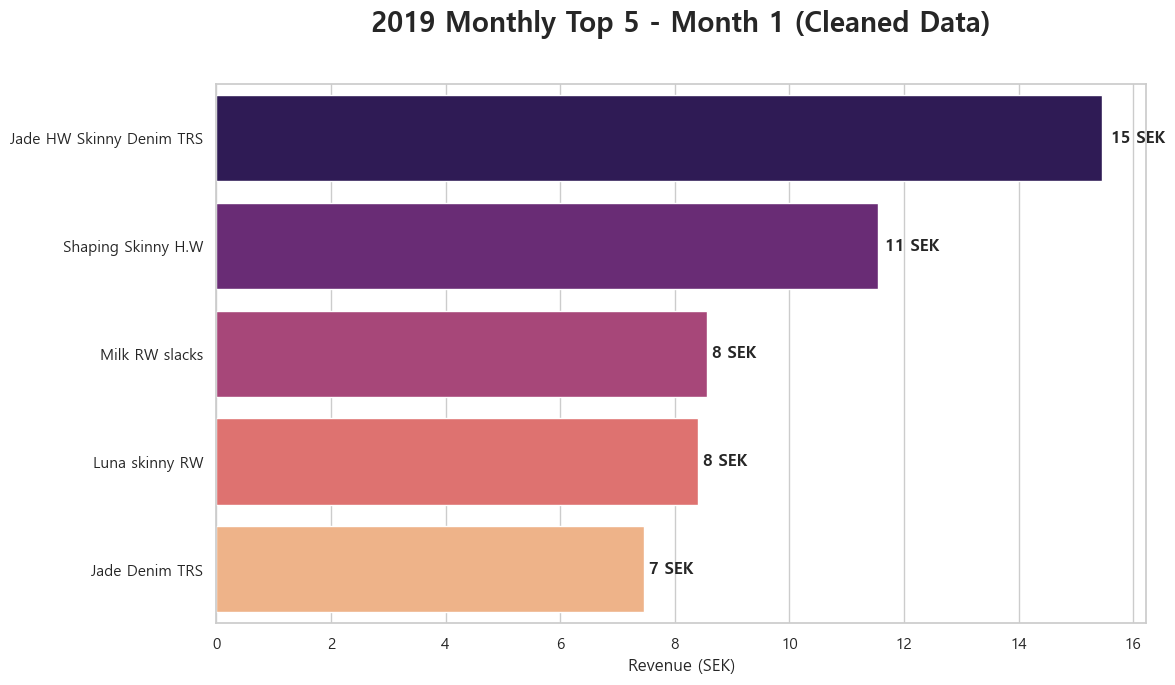

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


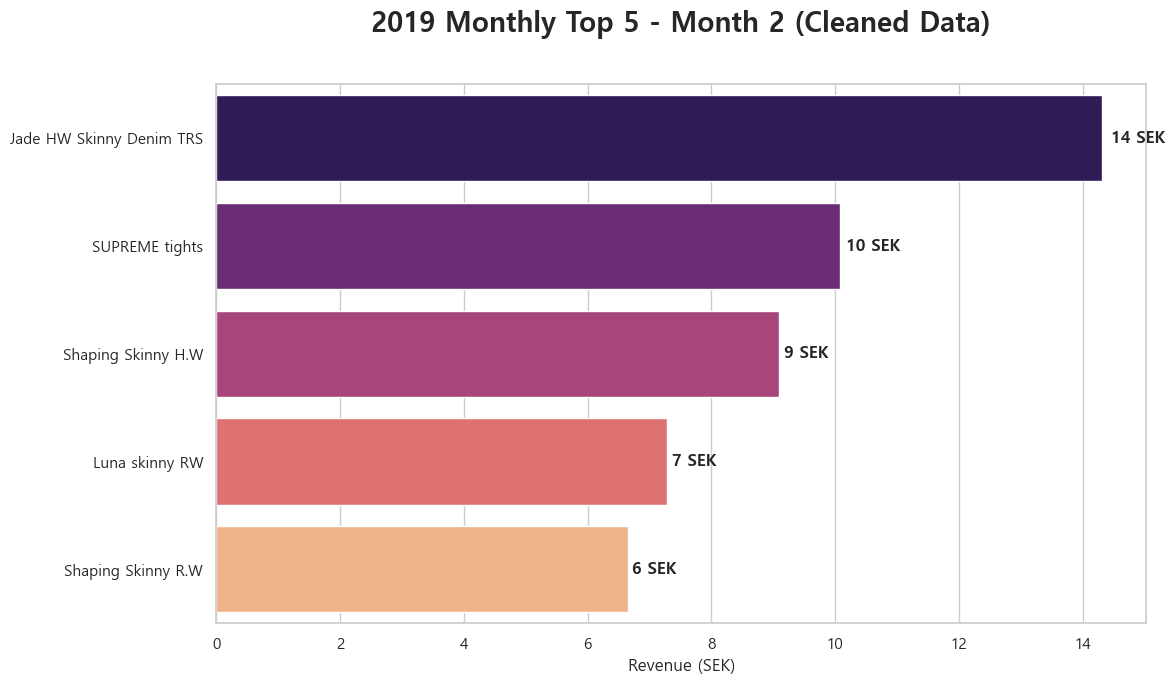

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


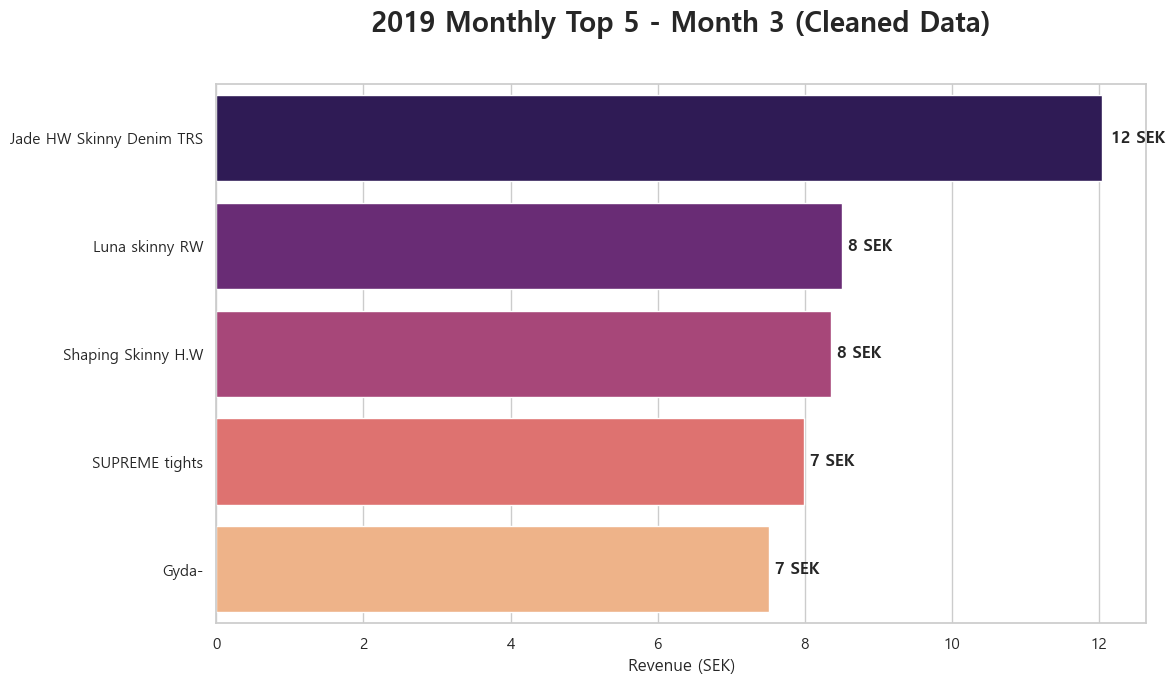

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


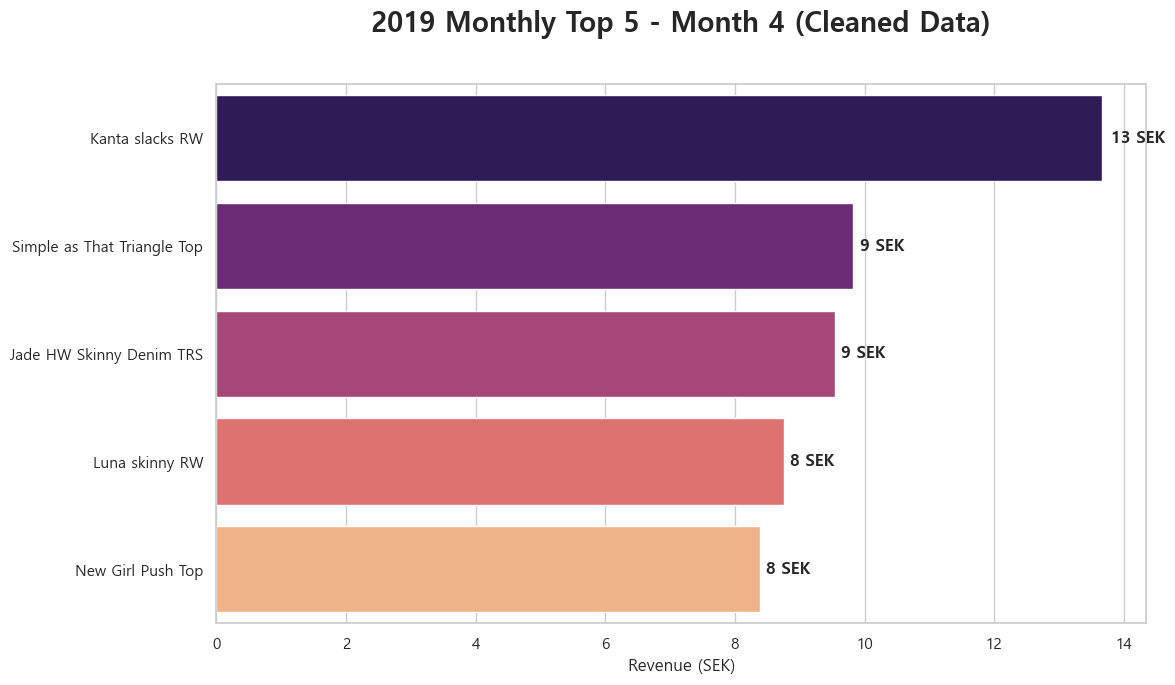

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


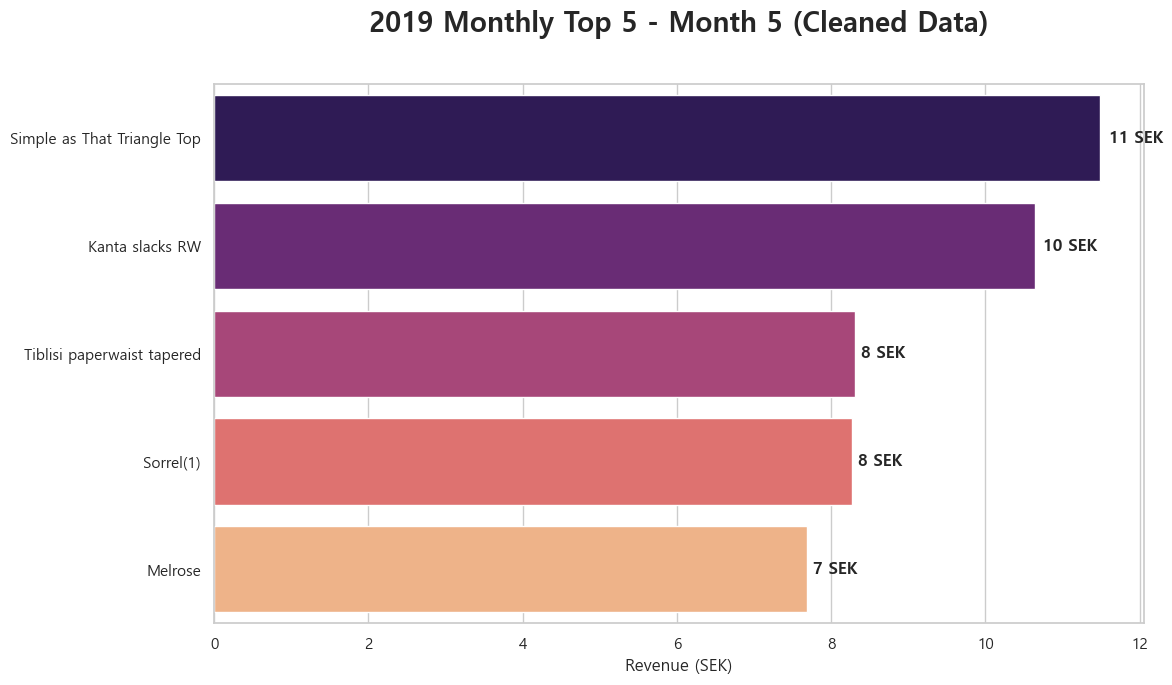

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


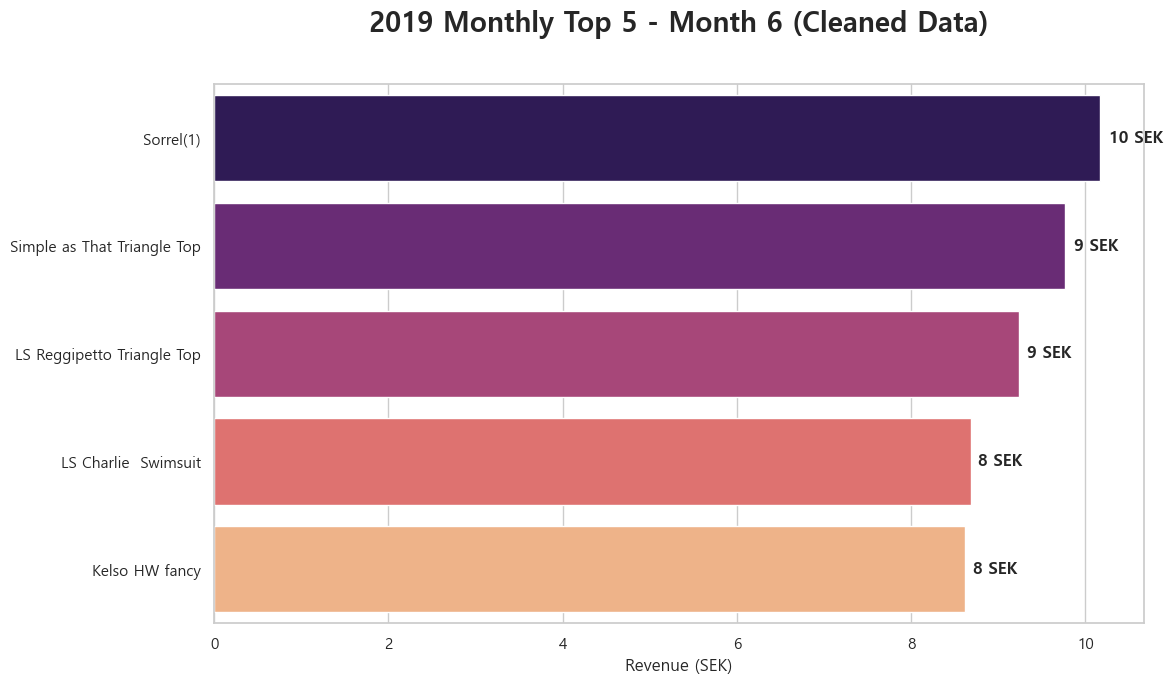

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


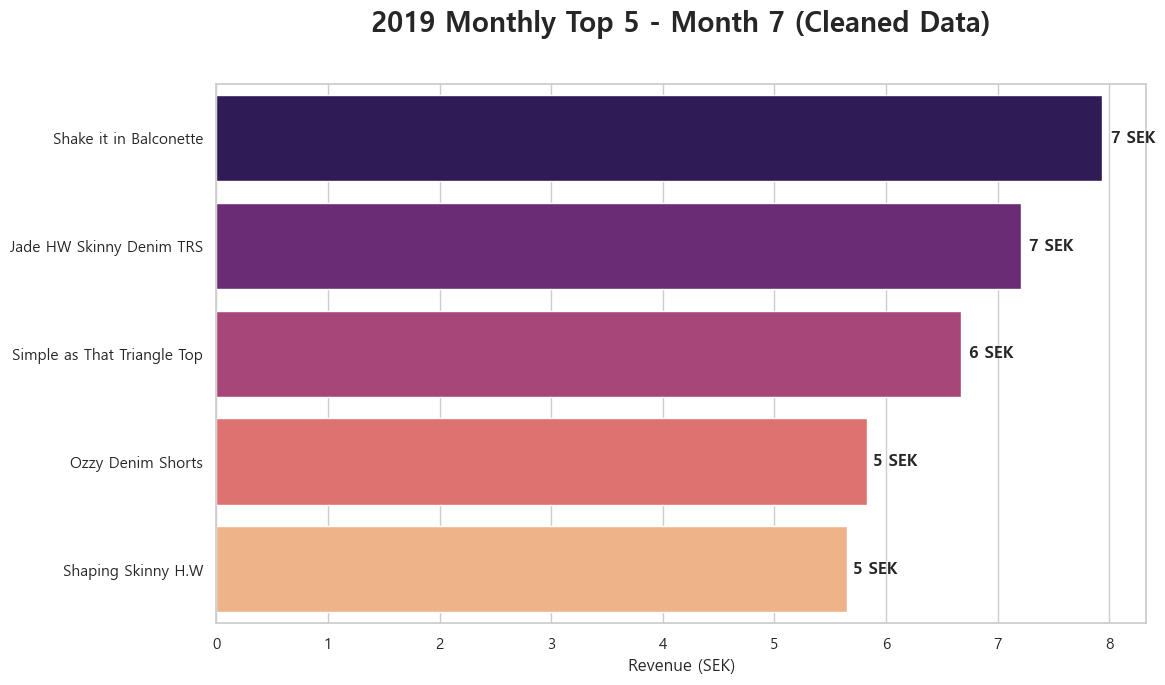

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


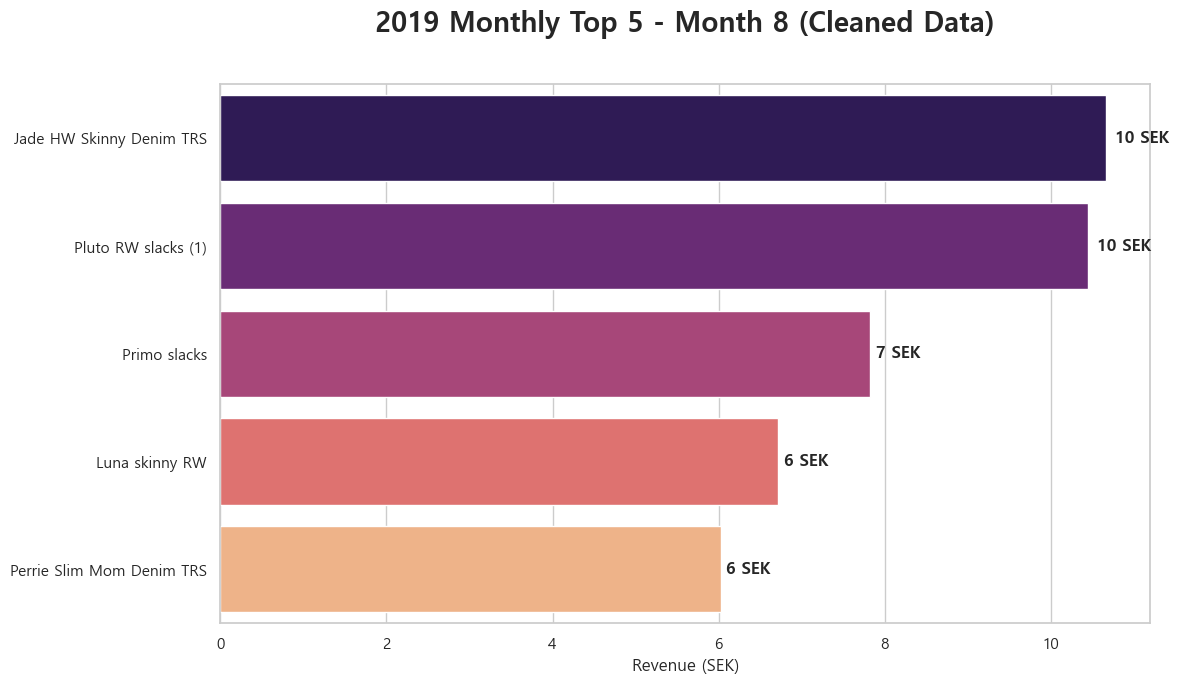

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


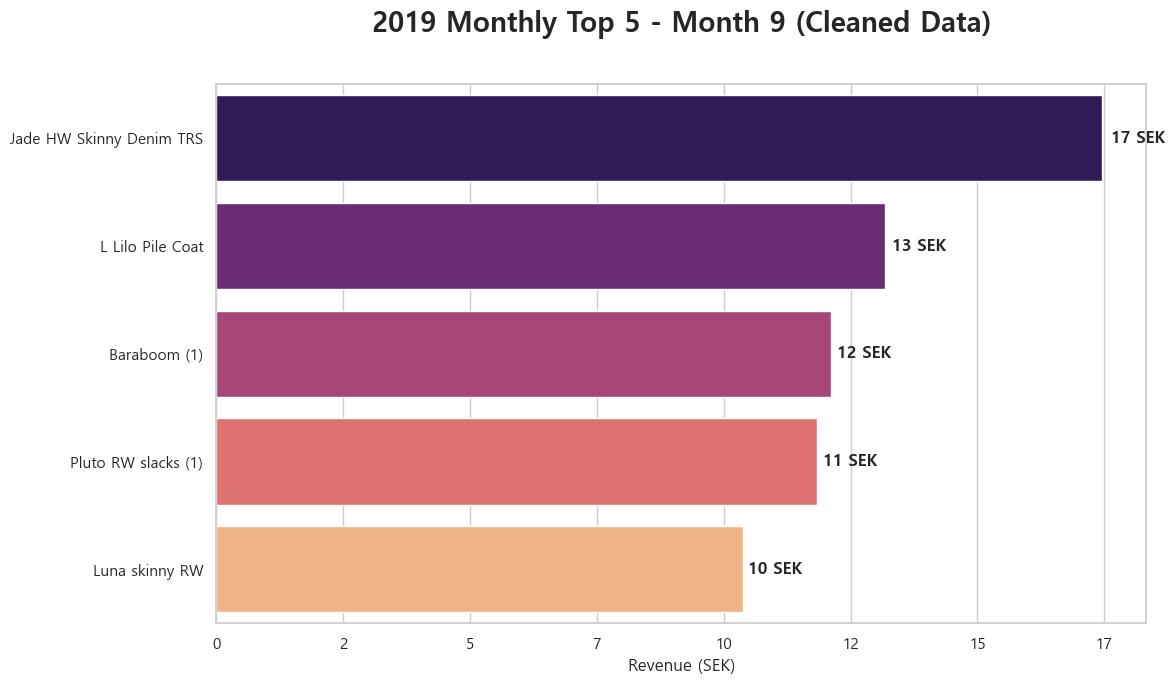

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


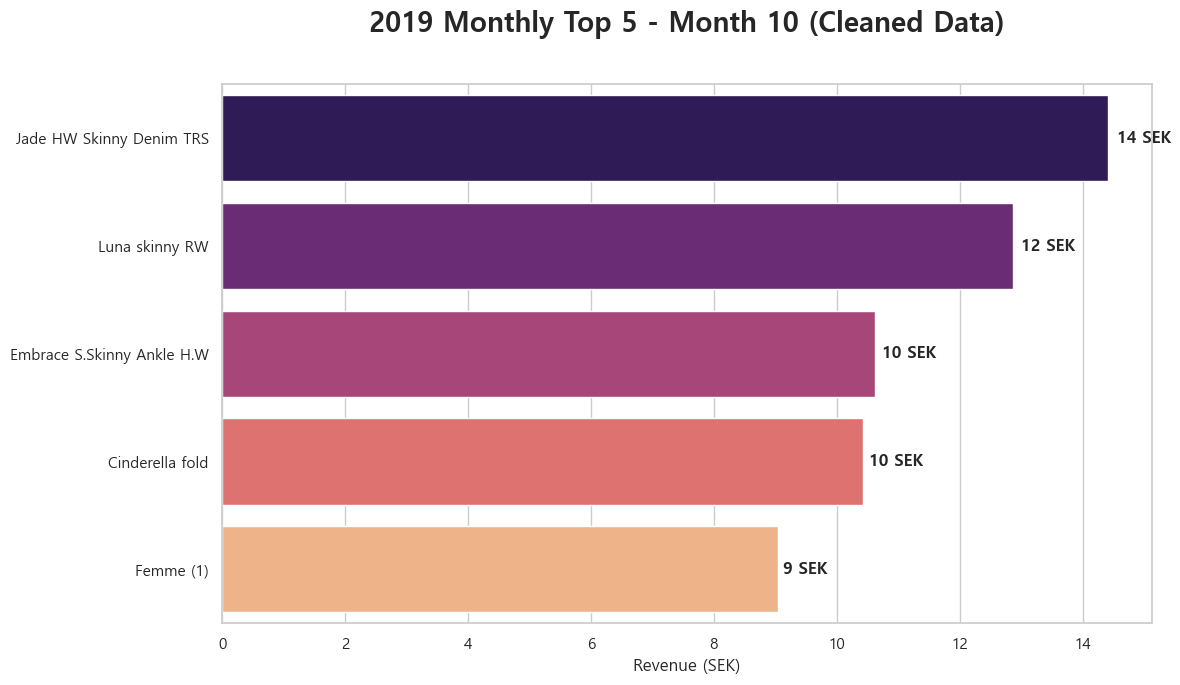

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


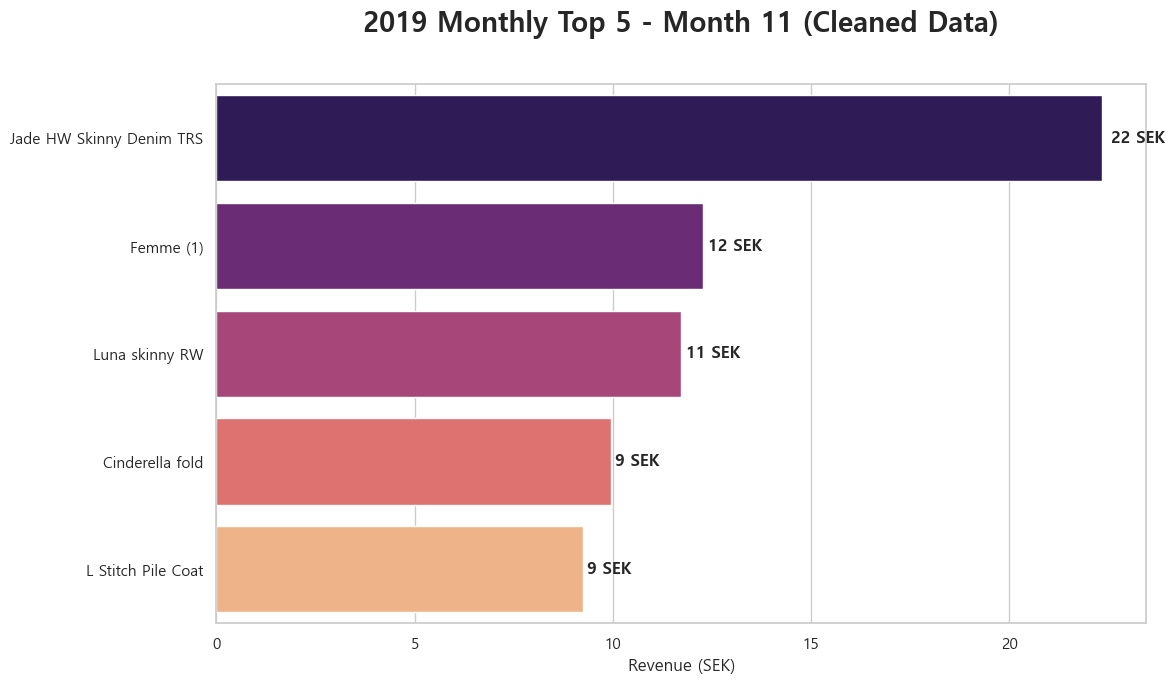

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


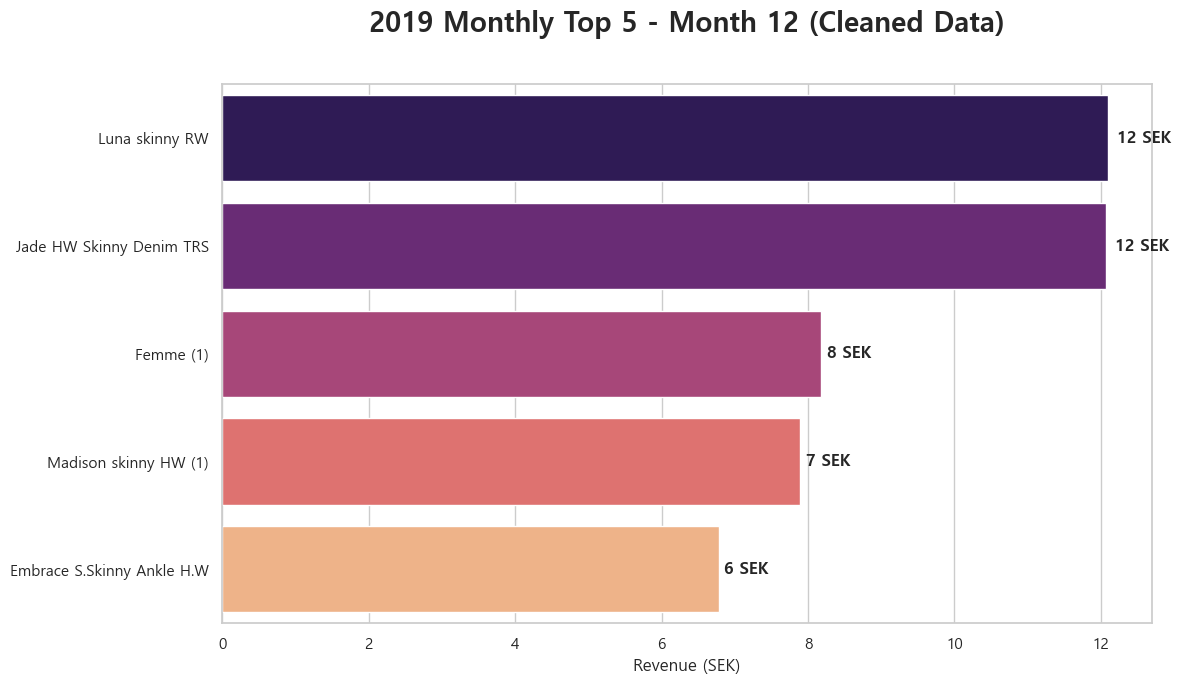

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# 스타일 설정
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'

DATA_PATH = "./data/"

# 1. 컬럼 선택 로드 및 필터링
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_hm.csv"), usecols=['t_dat', 'customer_id', 'article_id', 'price'])
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_hm.csv"), usecols=['article_id', 'prod_name'])
customer = pd.read_csv(os.path.join(DATA_PATH, "customer_hm.csv"), usecols=['customer_id'])

transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
df_2019 = transactions[transactions['t_dat'].dt.year == 2019].copy()
df_2019['month'] = df_2019['t_dat'].dt.month
del transactions

# 2. 정밀한 결합 (Inner Join & 결측치 제거)
df_clean = df_2019.merge(customer, on="customer_id", how="inner").merge(articles, on="article_id", how="inner")
df_clean = df_clean.dropna(subset=['prod_name'])

# 3. 1~12월 그래프 순차 출력
for m in range(1, 13):
    data = df_clean[df_clean['month'] == m].groupby('prod_name')['price'].sum().nlargest(5).reset_index()
    data.columns = ['prod_name', 'revenue']
    if data.empty: continue
        
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화
    
    # 상단 제목 (빨간 동그라미 스타일)
    plt.title(f'2019 Monthly Top 5 - Month {m} (Cleaned Data)', fontsize=20, pad=30, fontweight='bold', y=1.02)
    
    # 막대 옆 금액 표시
    for p in ax.patches:
        ax.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2, f'{int(p.get_width()):,} SEK', va='center', fontweight='bold')
    
    # X축 포맷 설정
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel('Revenue (SEK)', fontsize=12)
    plt.ylabel('')
    plt.subplots_adjust(top=0.88)
    plt.show()

In [111]:
import pandas as pd
import os

# 1. 경로 설정 및 데이터 로드 (어제와 동일한 환경 구축)
DATA_PATH = "./data/"
customer = pd.read_csv(os.path.join(DATA_PATH, "customer_hm.csv"))
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_hm.csv"))
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_hm.csv"))

# 2. 모든 데이터를 살리는 Left Join (이미지 1의 inner를 left로 변경)
df_all = transactions.merge(customer, on="customer_id", how="left")
df_all = df_all.merge(articles, on="article_id", how="left")

# 3. 날짜 데이터 처리
df_all["t_dat"] = pd.to_datetime(df_all["t_dat"])
df_all["year"] = df_all["t_dat"].dt.year
df_all["month"] = df_all["t_dat"].dt.month

# 4. 2019년 필터링 (결측치 제거 없이 진행)
df_2019_all = df_all[df_all["year"] == 2019].copy()
df_2019_all['revenue'] = df_2019_all['price']
df_2019_all['sales_count'] = 1

# 5. 1~12월 루프를 돌며 TOP 5 집계
monthly_top5_all_list = []

for m in range(1, 13):
    # 해당 월 필터링
    df_month = df_2019_all[df_2019_all['month'] == m]
    
    # 매출 기준 TOP 5 추출 (결측 데이터도 이름이 있다면 포함됨)
    top_5 = df_month.groupby('prod_name').agg({
        'revenue': 'sum', 
        'sales_count': 'sum'
    }).nlargest(5, 'revenue').reset_index()
    
    top_5['month'] = m
    
    # 대표 ID 연결
    top_5 = pd.merge(top_5, df_representative_id, on='prod_name', how='left')
    monthly_top5_all_list.append(top_5)

# 최종 결과 합치기
df_final_all = pd.concat(monthly_top5_all_list)

print("✅ [모든 데이터 포함 버전] 1~12월 월별 통합 TOP 5 분석 완료")
display(df_final_all.style.hide(axis='index'))

✅ [모든 데이터 포함 버전] 1~12월 월별 통합 TOP 5 분석 완료


prod_name,revenue,sales_count,month,rep_article_id
Jade HW Skinny Denim TRS,19.949390,595,1,706016001
Shaping Skinny H.W,14.767949,190,1,399201002
Milk RW slacks,11.100864,332,1,695545001
Luna skinny RW,10.519254,348,1,562245001
Jade Denim TRS,9.642610,423,1,539723001
Jade HW Skinny Denim TRS,17.629051,541,2,706016001
SUPREME tights,13.422322,421,2,484398001
Shaping Skinny H.W,11.706254,150,2,399201002
Luna skinny RW,9.427830,310,2,562245001
Shaping Skinny R.W,8.609220,120,2,399136011


C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


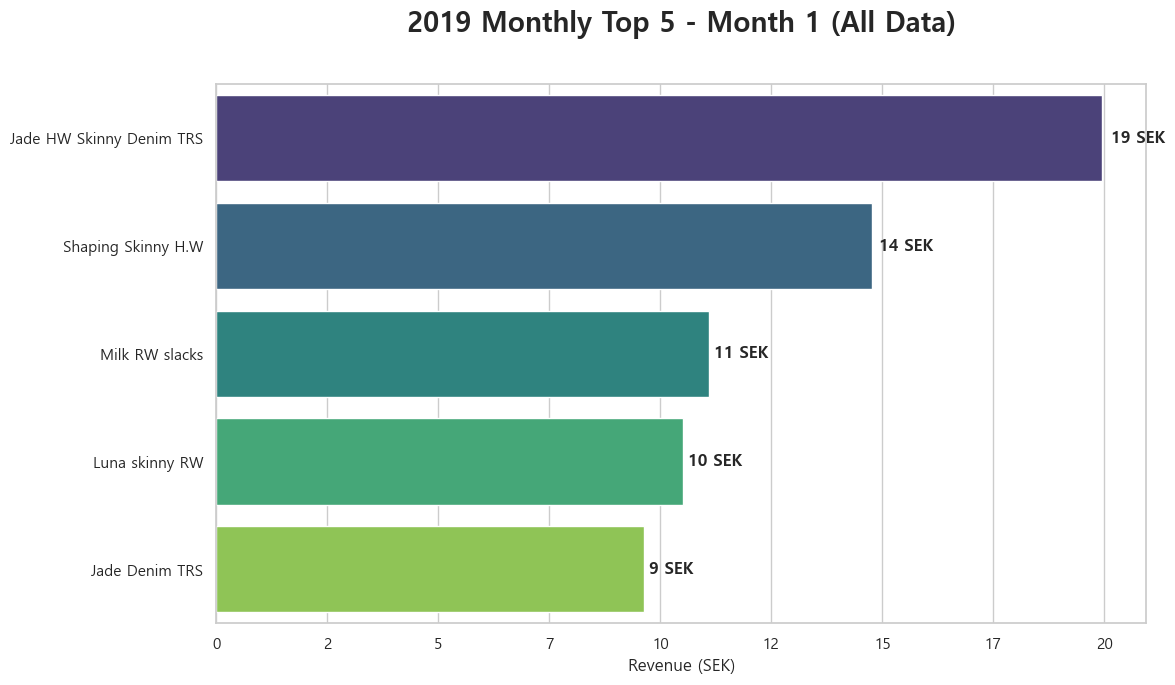

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


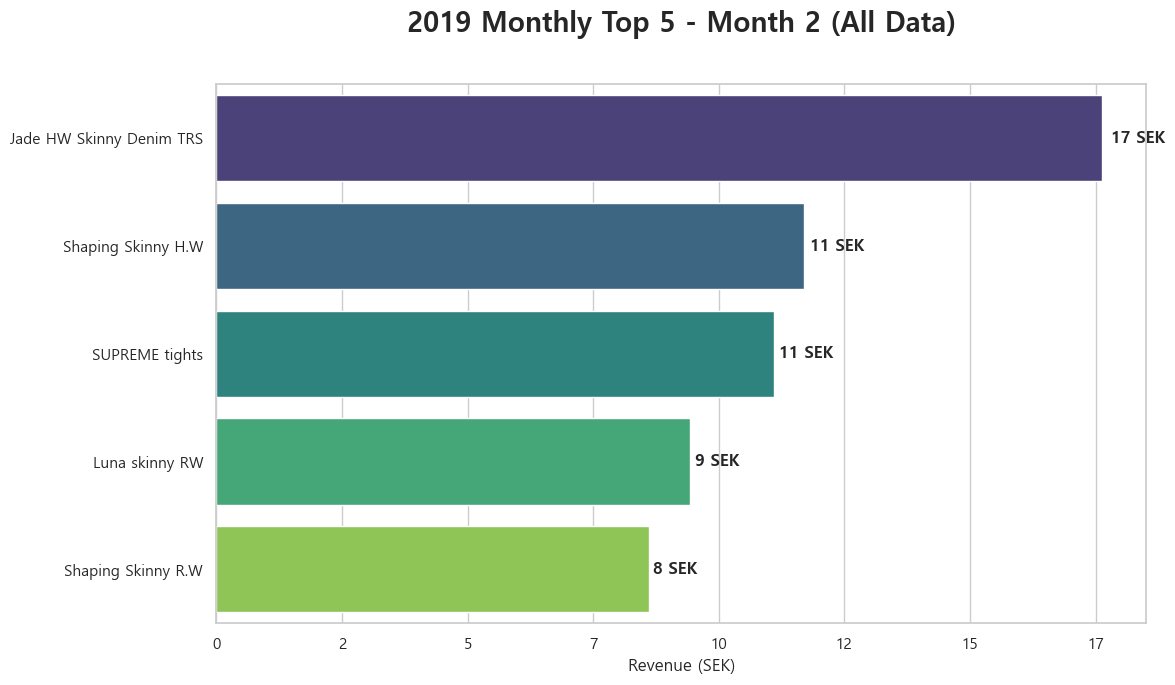

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


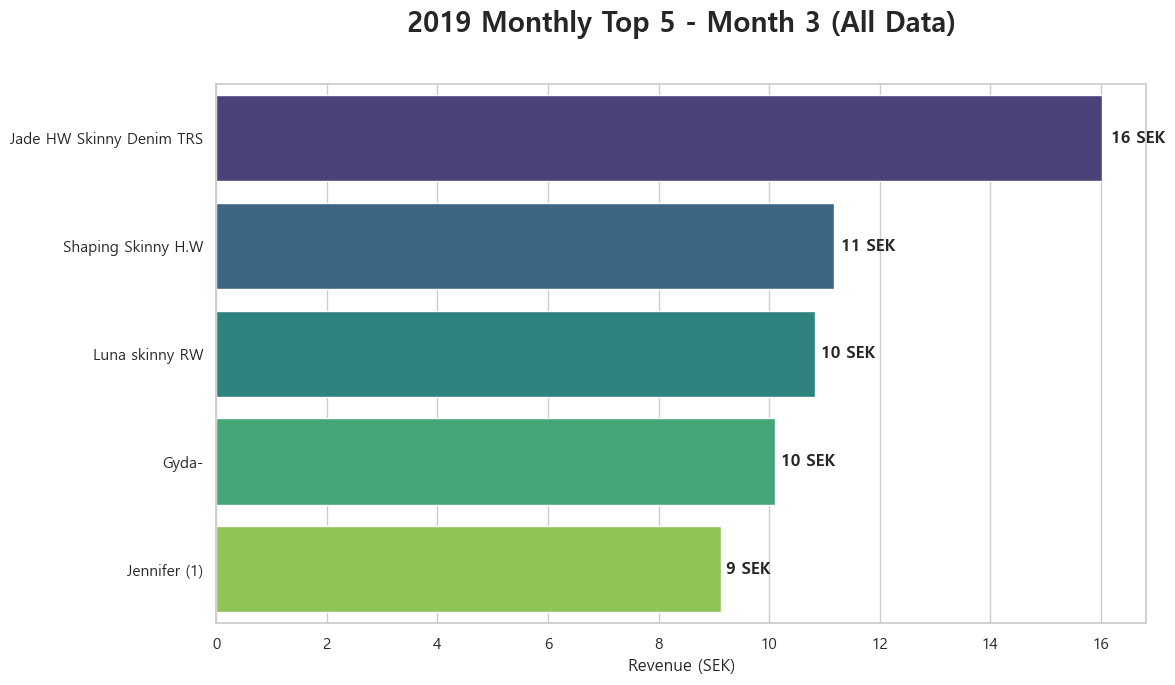

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


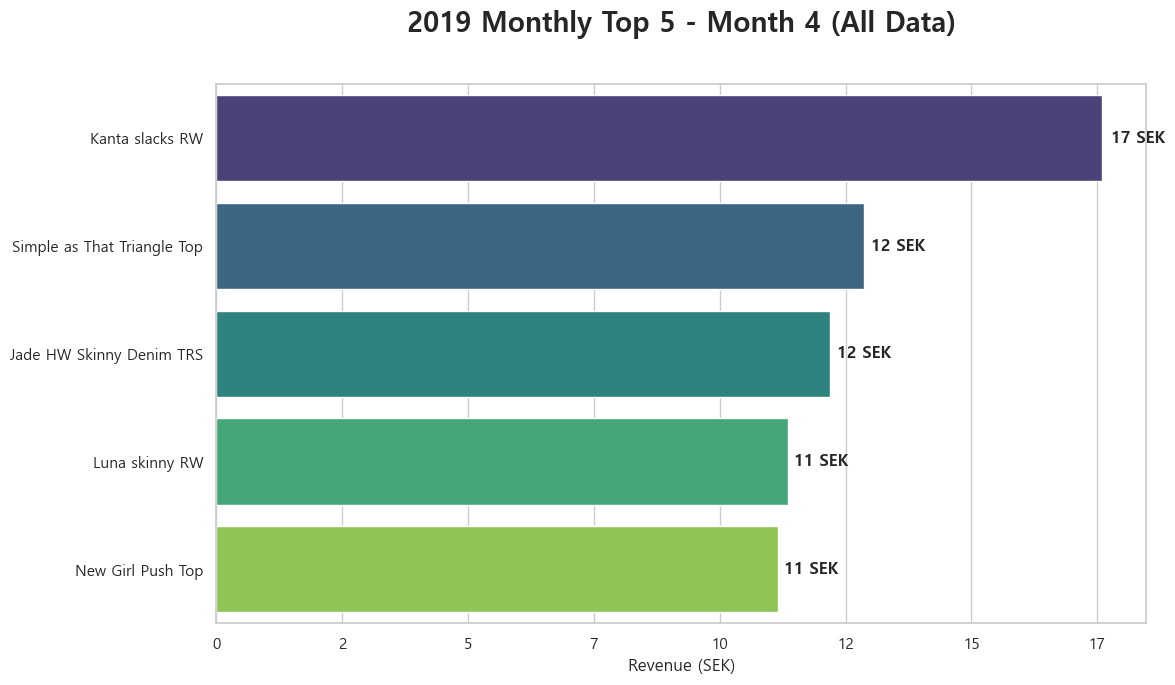

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


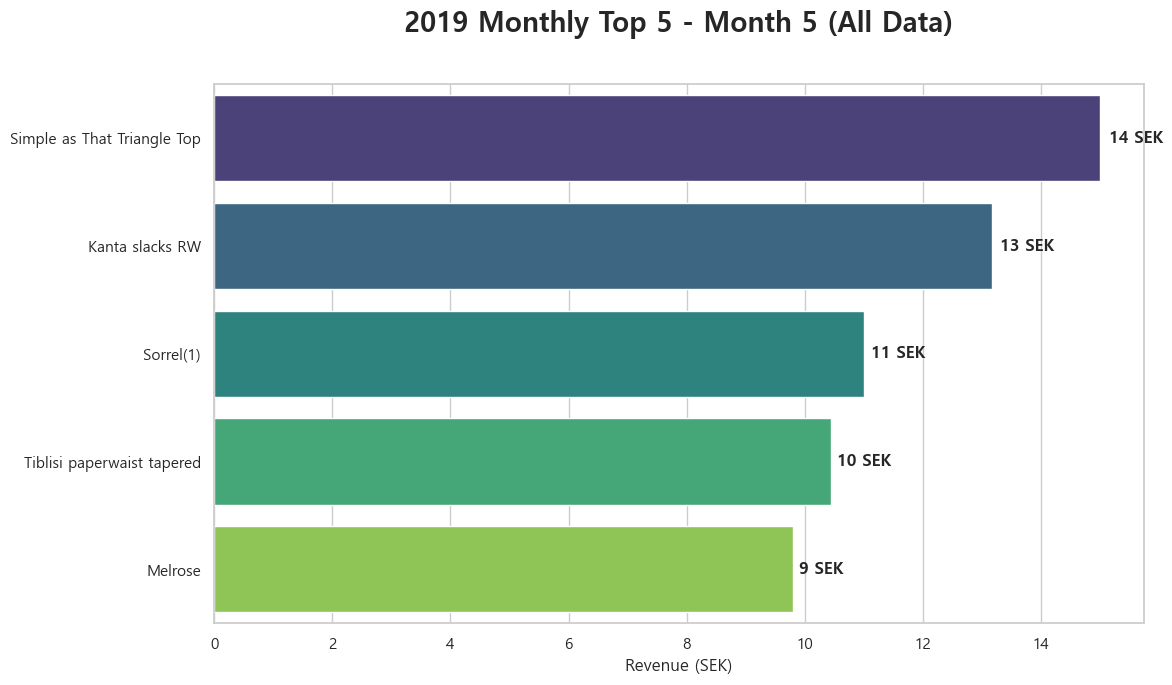

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


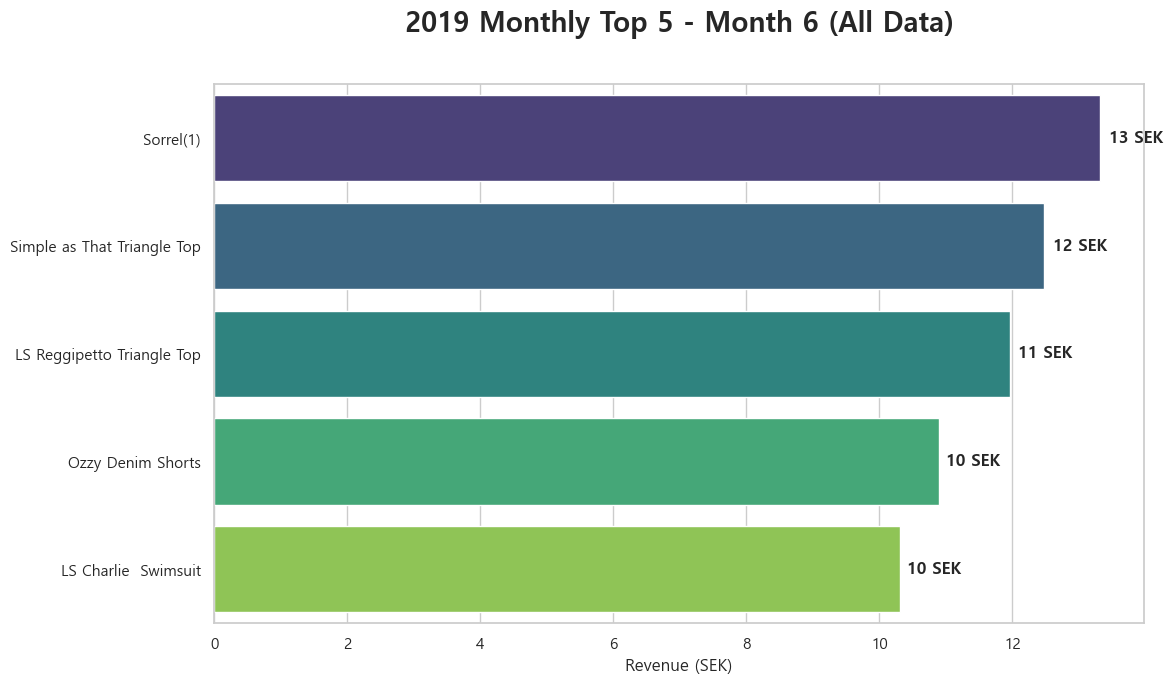

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


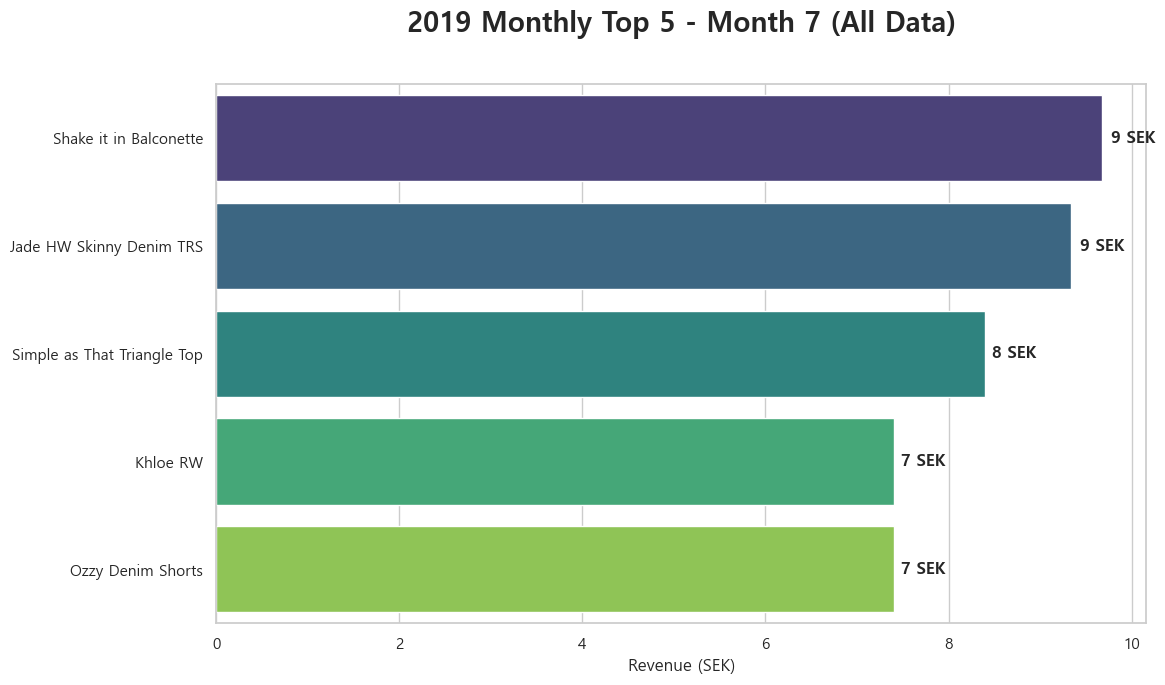

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


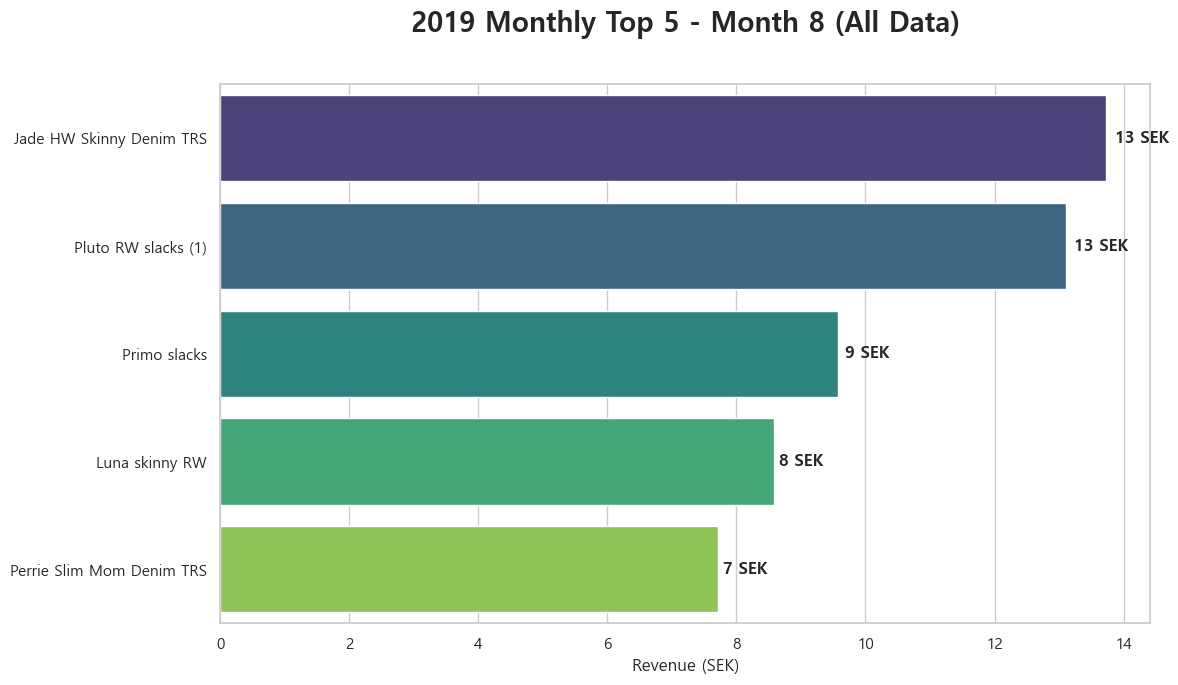

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


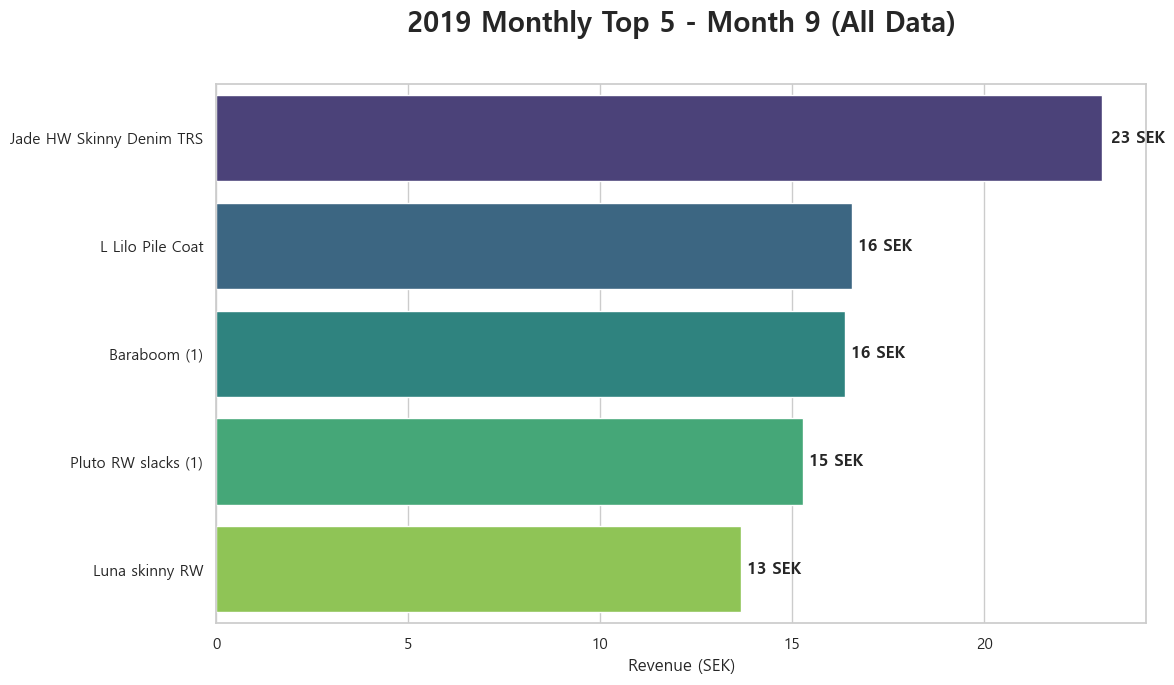

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


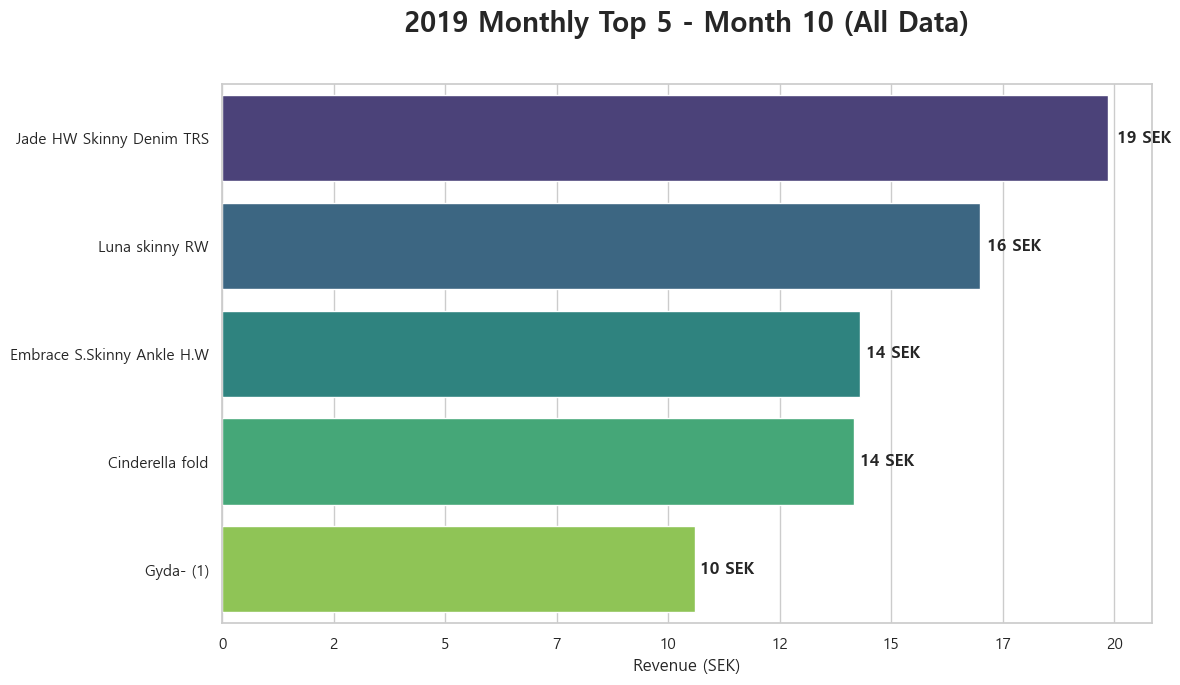

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


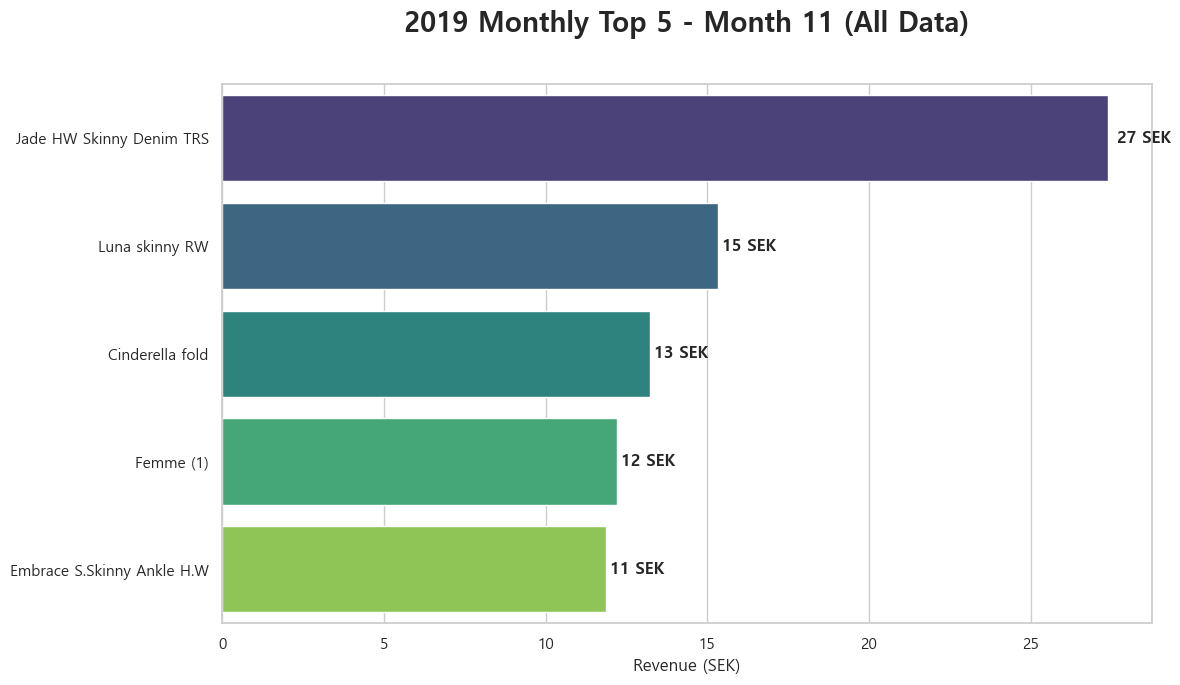

C:\Users\임종민\AppData\Local\Temp\ipykernel_36488\1076774692.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


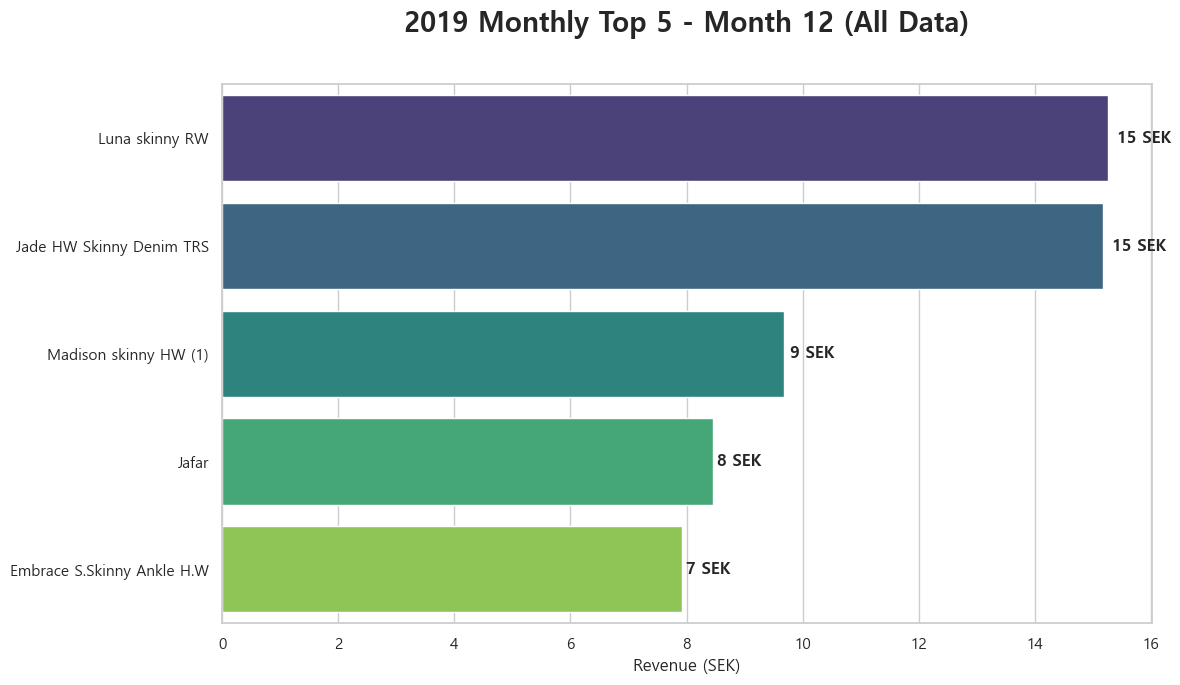

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# 스타일 설정
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

DATA_PATH = "./data/"

# 1. 메모리 최적화를 위해 필요한 컬럼만 로드
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_c.csv"), usecols=['t_dat', 'customer_id', 'article_id', 'price'])
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"), usecols=['article_id', 'prod_name'])
customer = pd.read_csv(os.path.join(DATA_PATH, "customers_c.csv"), usecols=['customer_id'])

# 2. 2019년 데이터 즉시 필터링 (메모리 확보)
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
df_2019 = transactions[transactions['t_dat'].dt.year == 2019].copy()
df_2019['month'] = df_2019['t_dat'].dt.month
del transactions # 원본 삭제

# 3. 모든 거래를 유지하는 Left Join
df_all = df_2019.merge(customer, on="customer_id", how="left").merge(articles, on="article_id", how="left")

# 4. 1~12월 그래프 순차 출력
for m in range(1, 13):
    data = df_all[df_all['month'] == m].groupby('prod_name')['price'].sum().nlargest(5).reset_index()
    data.columns = ['prod_name', 'revenue']
    if data.empty: continue
       
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')

    # 상단 제목 (빨간 동그라미 스타일)
    plt.title(f'2019 Monthly Top 5 - Month {m} (All Data)', fontsize=20, pad=30, fontweight='bold', y=1.02)

    # 막대 옆 금액 표시
    for p in ax.patches:
        ax.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2, f'{int(p.get_width()):,} SEK', va='center', fontweight='bold')

    # X축 포맷 설정
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel('Revenue (SEK)', fontsize=12)
    plt.ylabel('')
    plt.subplots_adjust(top=0.88)
    plt.show()

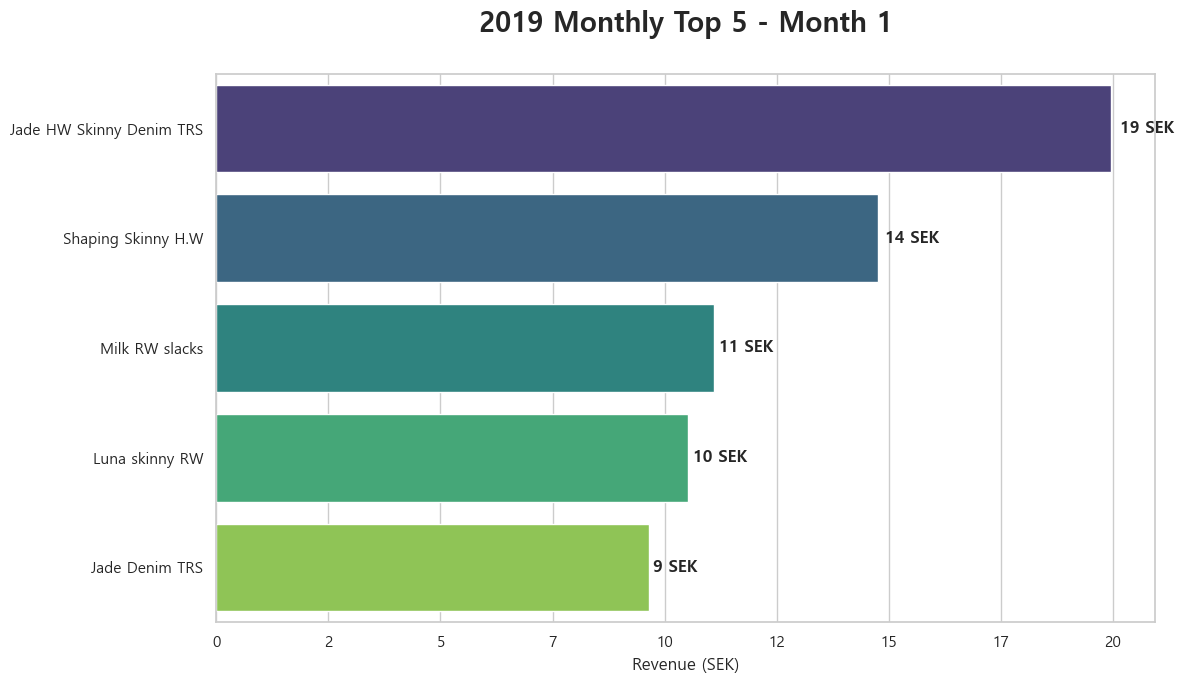

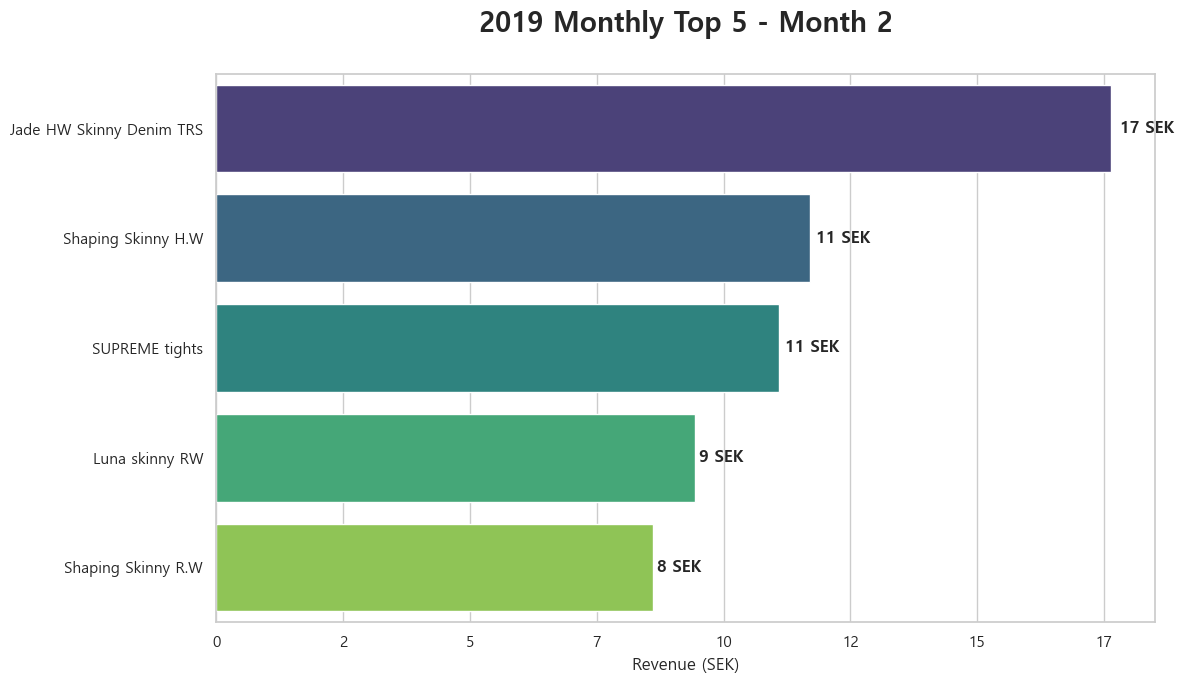

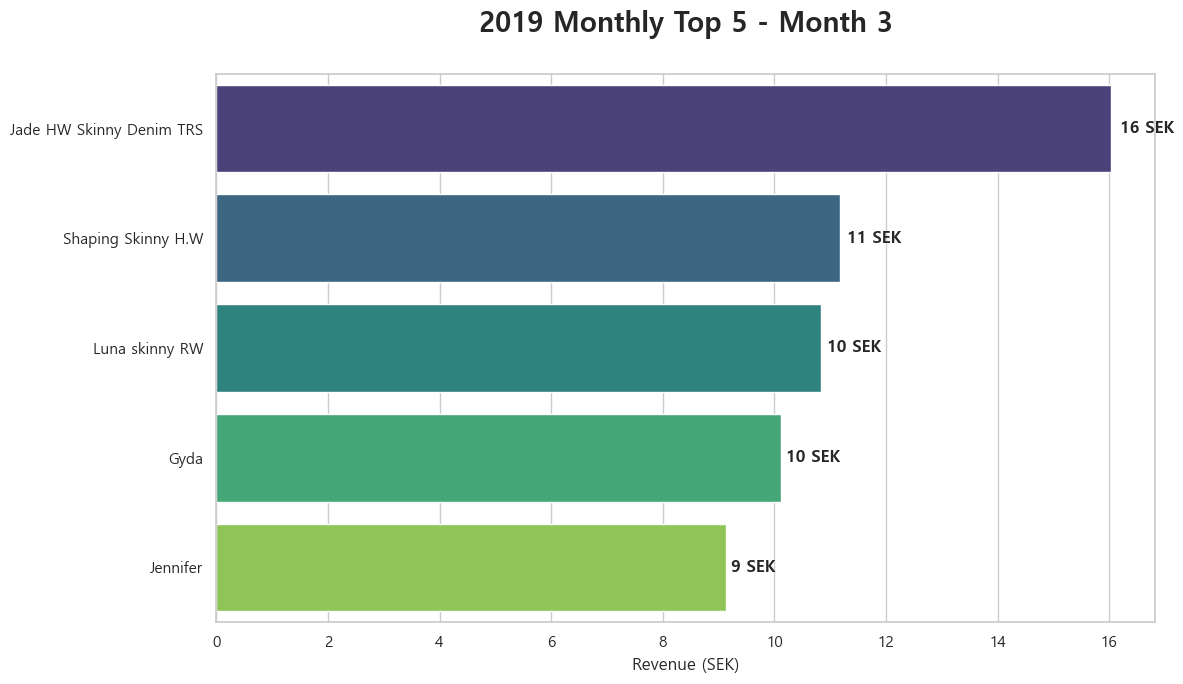

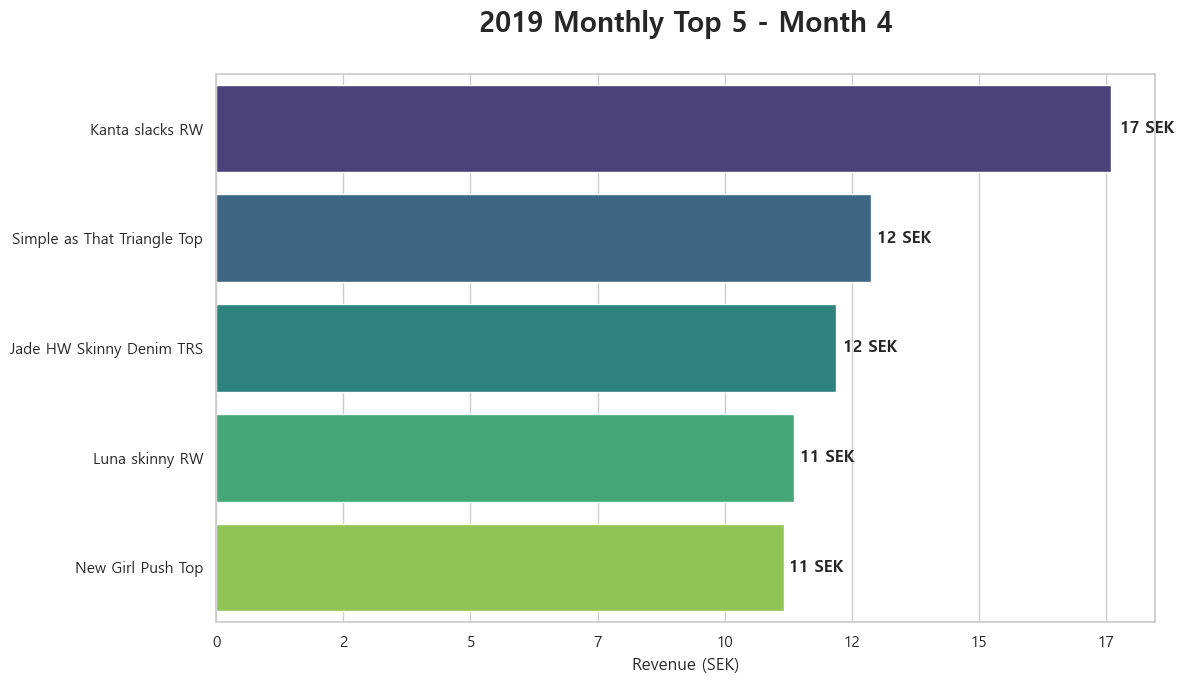

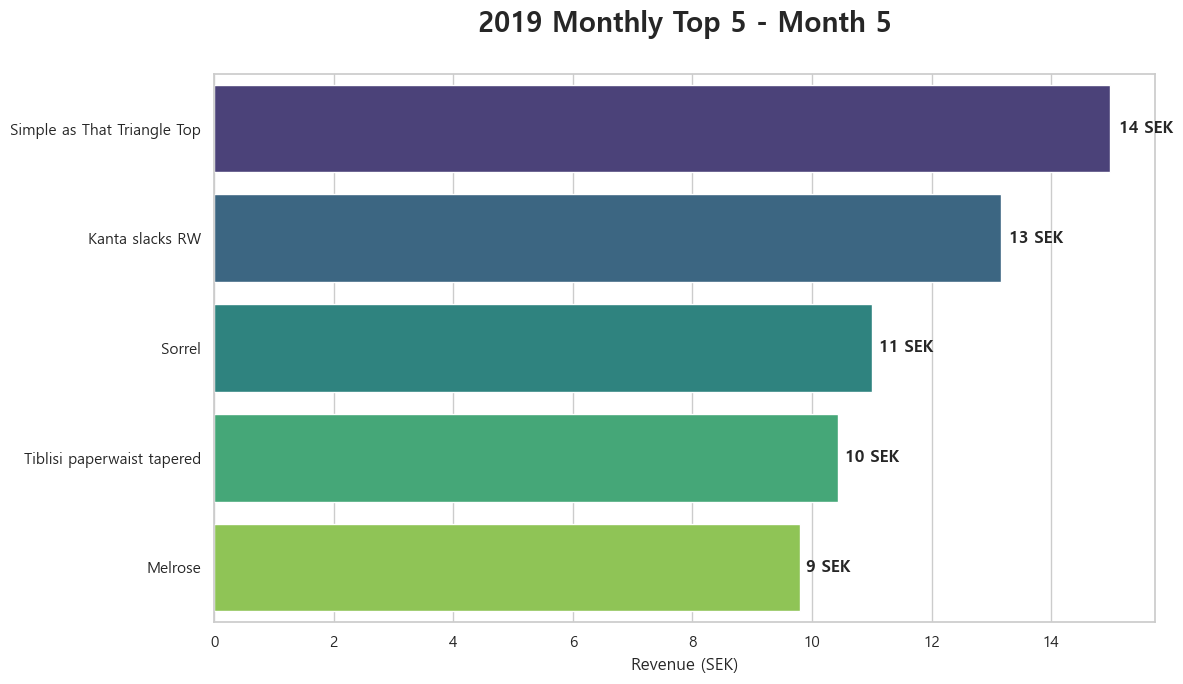

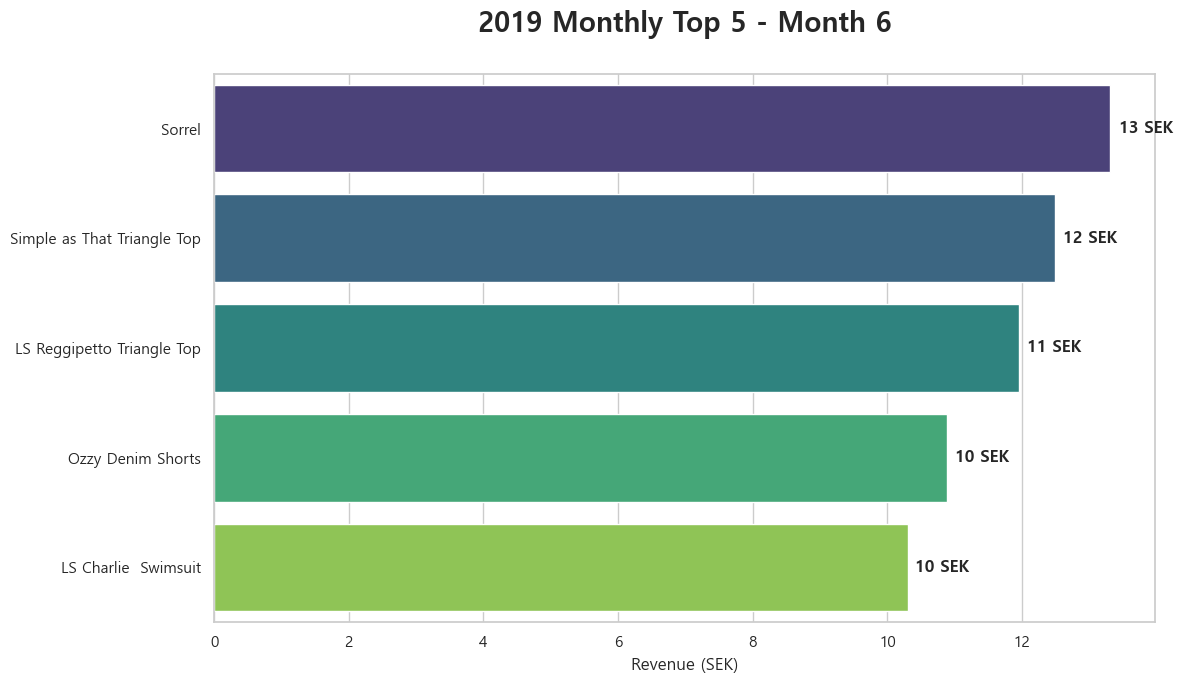

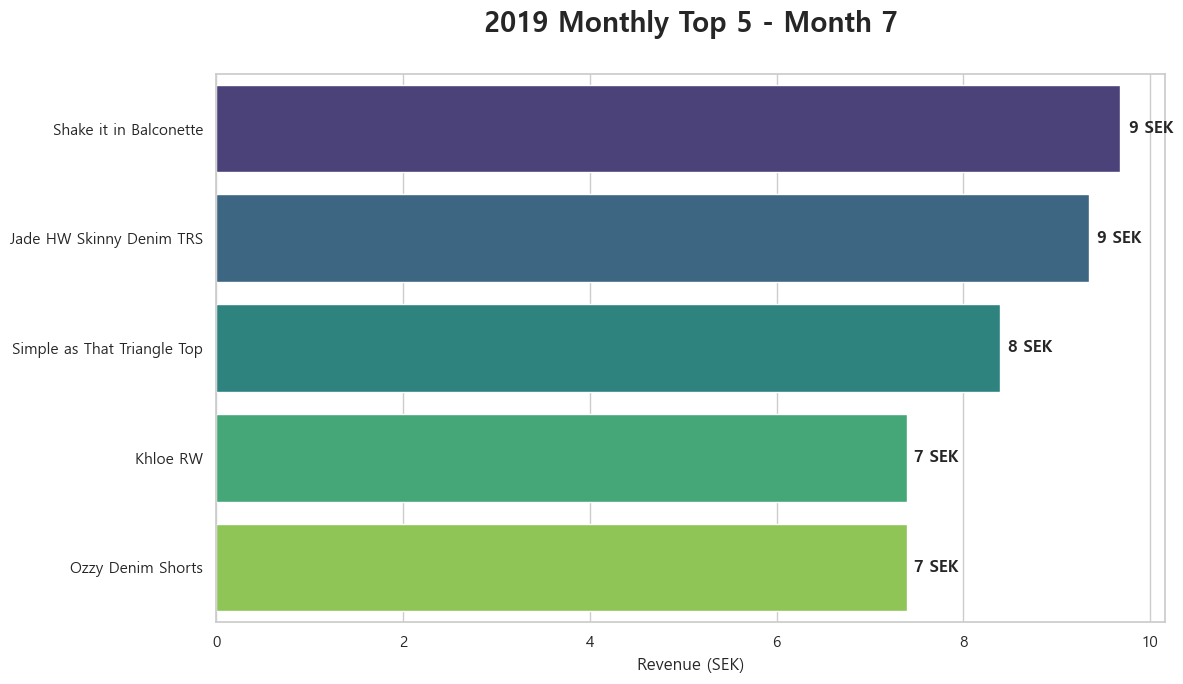

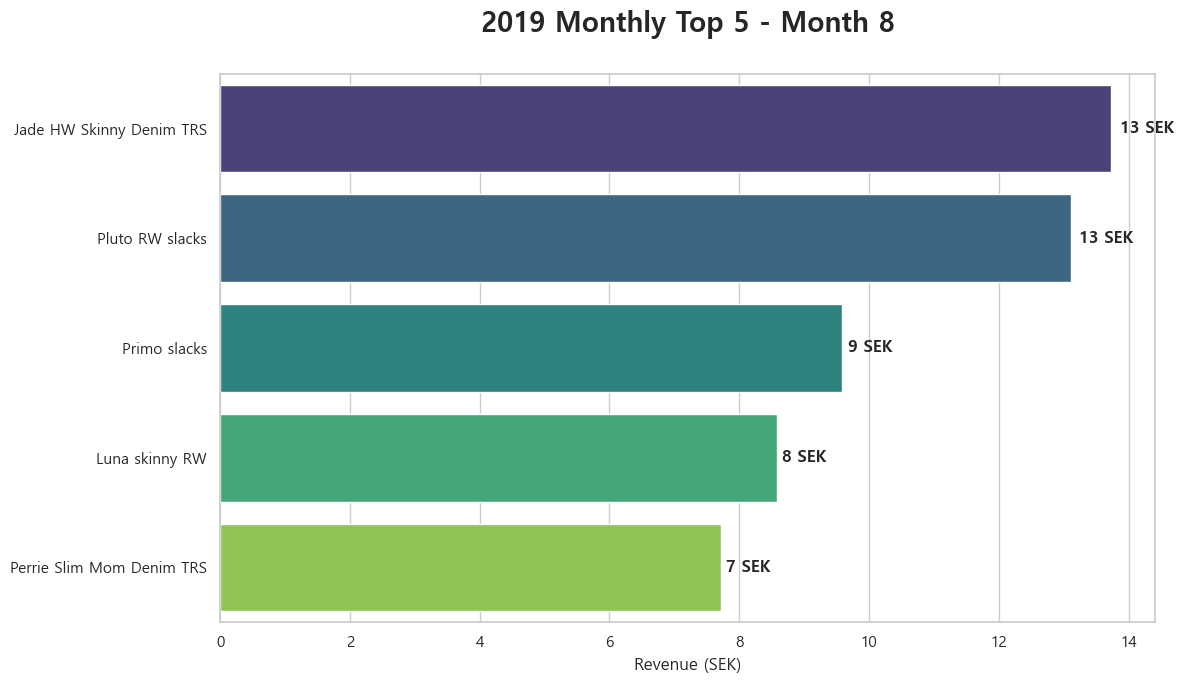

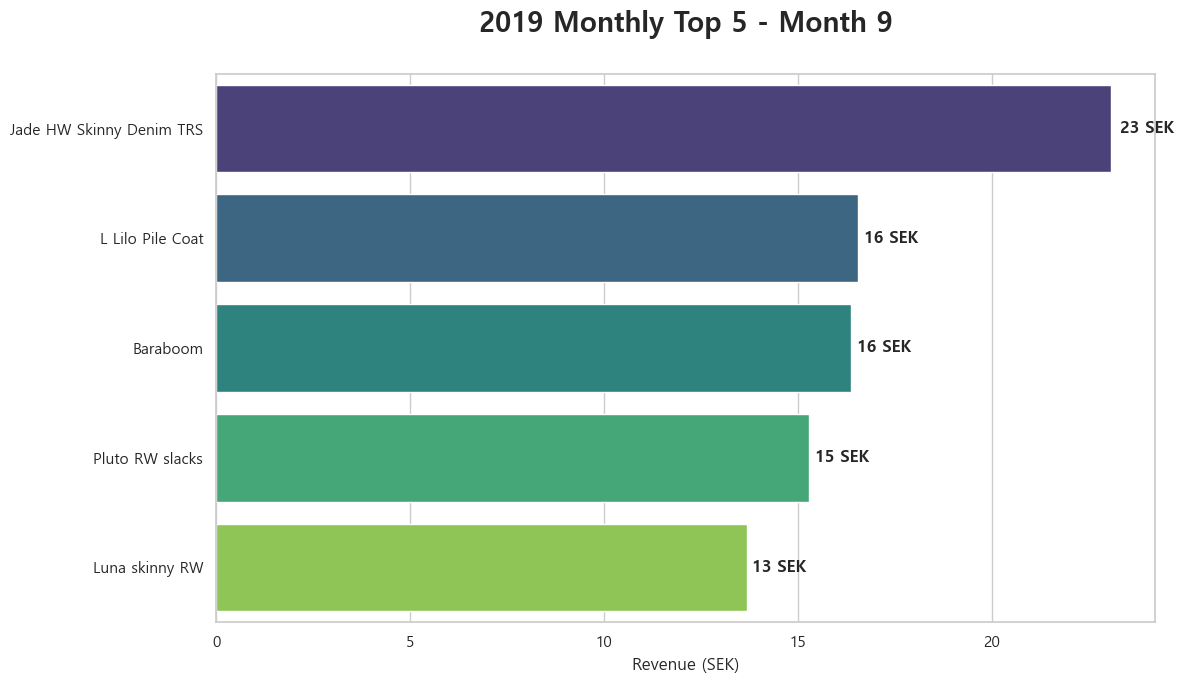

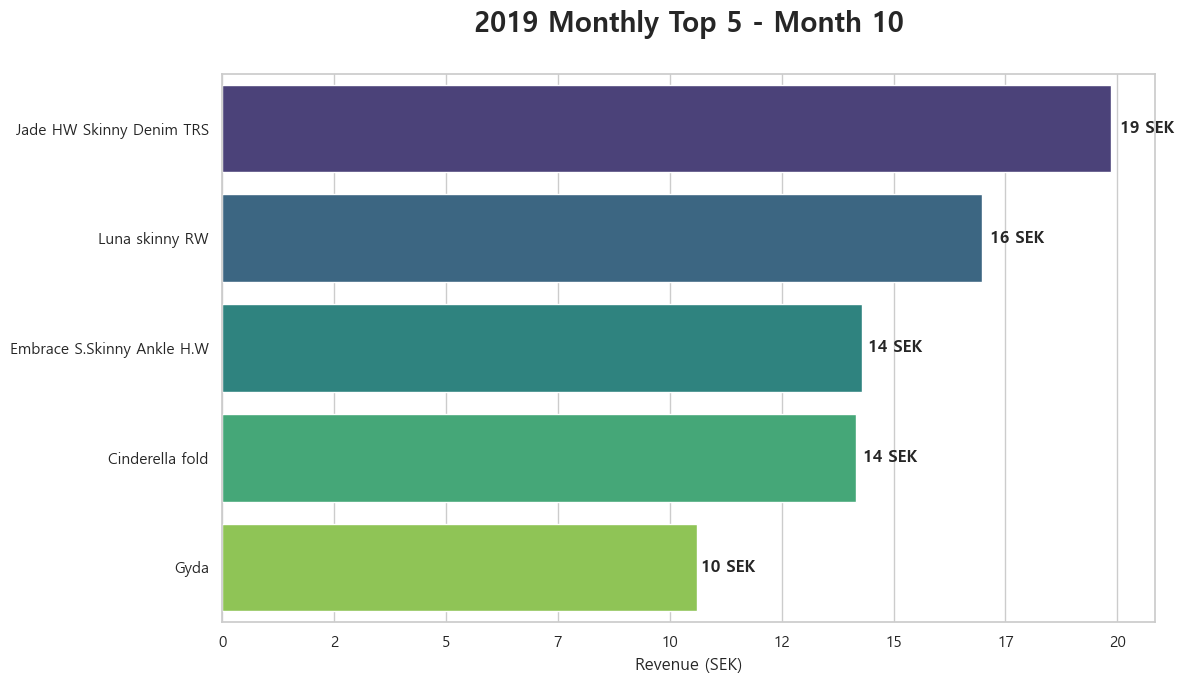

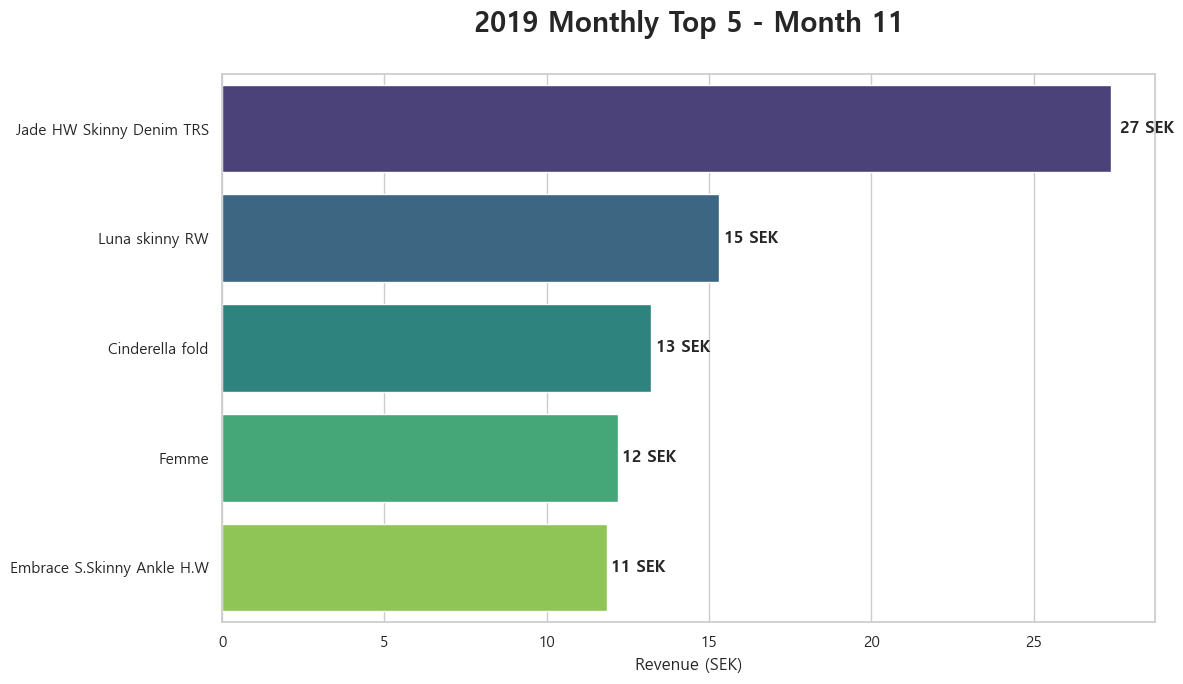

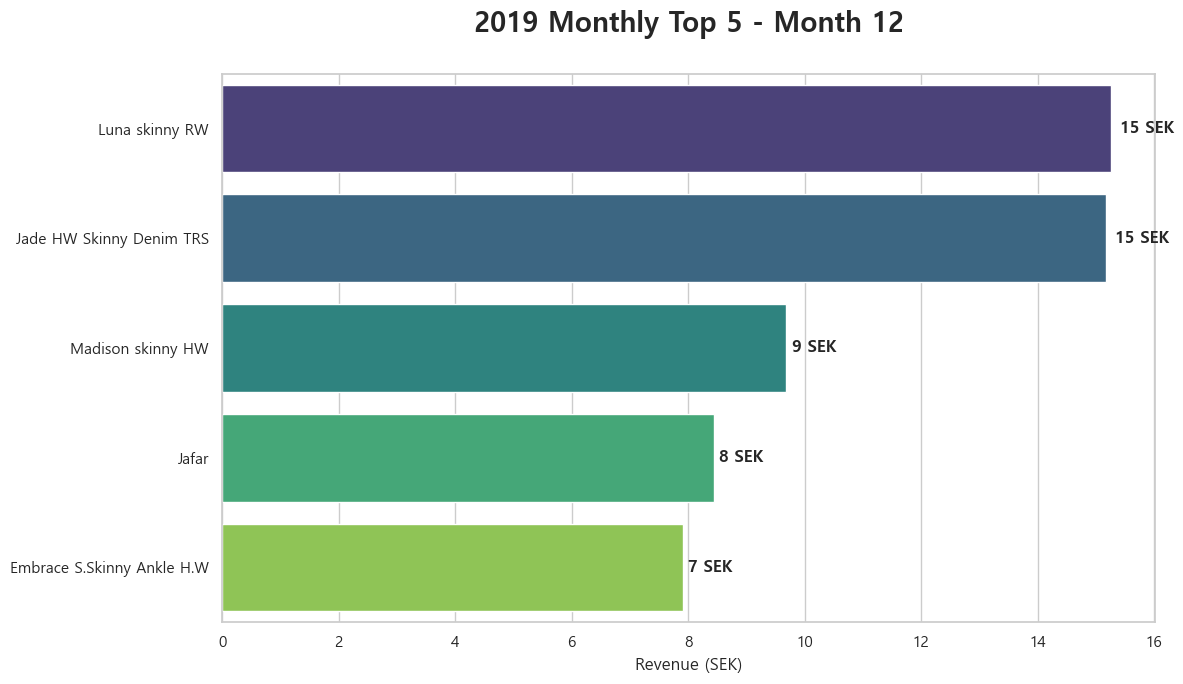

In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 스타일 설정
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# [자동 경로 설정]
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data")

# 1. 데이터 로드 (정제하지 않고 원본 그대로 로드)
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_c.csv"), usecols=['t_dat', 'customer_id', 'article_id', 'price'])
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"), usecols=['article_id', 'prod_name'])
customer = pd.read_csv(os.path.join(DATA_PATH, "customers_c.csv"), usecols=['customer_id'])

# 2. 2019년 데이터 필터링
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
df_2019 = transactions[transactions['t_dat'].dt.year == 2019].copy()
df_2019['month'] = df_2019['t_dat'].dt.month
del transactions 

# 3. 데이터 병합 (원본 이름 유지)
df_all = df_2019.merge(customer, on="customer_id", how="left").merge(articles, on="article_id", how="left")

# 4. 그래프 출력
for m in range(1, 13):
    # [중요] 원본 이름(prod_name) 기준으로 먼저 그룹화하여 순위를 매깁니다. (데이터 변동 없음)
    data = df_all[df_all['month'] == m].groupby('prod_name')['price'].sum().nlargest(5).reset_index()
    data.columns = ['prod_name', 'revenue']
    if data.empty: continue
    
    # [수정 포인트] 순위가 결정된 후, 그래프에 표시될 이름만 정제합니다.
    # 이렇게 하면 Supreme Tights가 그대로 순위에 남고 이름의 기호만 사라집니다.
    data['display_name'] = data['prod_name'].str.replace(r'\s*\(\d+\)', '', regex=True)
    data['display_name'] = data['display_name'].str.replace(r'\s*[-]\s*$', '', regex=True)
    data['display_name'] = data['display_name'].str.strip()
        
    plt.figure(figsize=(12, 7))
    # y축을 정제된 이름(display_name)으로 설정
    ax = sns.barplot(x='revenue', y='display_name', data=data, palette='viridis', hue='display_name', legend=False)

    plt.title(f'2019 Monthly Top 5 - Month {m}', fontsize=20, pad=30, fontweight='bold')

    for p in ax.patches:
        ax.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2, f'{int(p.get_width()):,} SEK', va='center', fontweight='bold')

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel('Revenue (SEK)', fontsize=12)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

In [128]:
# 1. 6월 데이터 필터링 및 Jade 데님 순위 추출
june_sales = monthly_sales[monthly_sales['month'] == 6].copy()
june_sales['rank'] = june_sales['price'].rank(ascending=False, method='min')

target_item = 'Jade HW Skinny Denim TRS'
june_rank_info = june_sales[june_sales['prod_name'] == target_item]

# 2. 결과 출력 (6월 순위 및 연간 순위 요약)
print(f"Product: {target_item}")
print("-" * 30)

if not june_rank_info.empty:
    june_rank = int(june_rank_info['rank'].values[0])
    print(f"June Rank: {june_rank}")
else:
    print("June Data: Not Found")

print("-" * 30)
print("Monthly Rank History (1-12):")
print(result[['month', 'rank']].sort_values('month').to_string(index=False))


Product: Jade HW Skinny Denim TRS
------------------------------
June Rank: 11
------------------------------
Monthly Rank History (1-12):
 month  rank
     1   1.0
     2   1.0
     3   1.0
     4   3.0
     5   6.0
     6  11.0
     7   2.0
     8   1.0
     9   1.0
    10   1.0
    11   1.0
    12   2.0


In [130]:
import pandas as pd

# df_items에 해당 컬럼이 있는지 확인하고 merge합니다.
df_items_sub = df_items[['article_id', 'prod_name', 'product_group_name']]
df_merge_detail = pd.merge(df_trans[df_trans['month'] == 6], df_items_sub, on='article_id', how='left')

# 2. 6월 상품별 매출 합계 및 순위 계산
june_analysis = df_merge_detail.groupby(['prod_name', 'product_group_name'])['price'].sum().reset_index()
june_analysis = june_analysis.sort_values(by='price', ascending=False).reset_index(drop=True)
june_analysis['rank'] = june_analysis.index + 1

# 3. 1위부터 11위까지 출력
print("2019 June Sales Top 11 Analysis")
print("-" * 70)
print(june_analysis.head(11)[['rank', 'prod_name', 'product_group_name']].to_string(index=False))
print("-" * 70)

2019 June Sales Top 11 Analysis
----------------------------------------------------------------------
 rank                   prod_name product_group_name
    1                   Sorrel(1)  Garment Full body
    2 Simple as That Triangle Top           Swimwear
    3  LS Reggipetto Triangle Top           Swimwear
    4              Kelso HW fancy Garment Lower body
    5           Ozzy Denim Shorts Garment Lower body
    6        LS Charlie  Swimsuit           Swimwear
    7          Waleo HW wide full Garment Lower body
    8  Tiblisi paperwaist tapered Garment Lower body
    9                     Melrose  Garment Full body
   10                     Sorreli  Garment Full body
   11    Jade HW Skinny Denim TRS Garment Lower body
----------------------------------------------------------------------


In [4]:
# 1. Femme 제품들의 월별 매출 합계 계산
femme_monthly_trend = femme_sales.groupby('month')['price'].sum().reset_index()

# 2. 비교를 위해 전체 제품의 월별 매출 합계 계산 (선택 사항이지만 흐름 파악에 좋음)
total_monthly_trend = df_trans.groupby('month')['price'].sum().reset_index()

# 3. 결과 출력
print("📊 [Femme 제품군 월별 매출 추이]")
print("-" * 45)
print(femme_monthly_trend.to_string(index=False))
print("-" * 45)

# 4. 분석 결과 해석 출력
max_month = femme_monthly_trend.loc[femme_monthly_trend['price'].idxmax(), 'month']
sep_sales = femme_monthly_trend[femme_monthly_trend['month'] == 9]['price'].values[0] if 9 in femme_monthly_trend['month'].values else 0
aug_sales = femme_monthly_trend[femme_monthly_trend['month'] == 8]['price'].values[0] if 8 in femme_monthly_trend['month'].values else 0

print(f"💡 분석 포인트:")
if sep_sales > aug_sales * 2: # 8월보다 9월에 2배 이상 팔렸다면
    print(f"- 8월 대비 9월 매출이 급증했습니다. 9월 신규 런칭 효과가 강력해 보입니다.")
else:
    print(f"- 이전부터 서서히 팔리다가 {int(max_month)}월에 정점을 찍었습니다.")

print(f"- Femme 제품이 가장 많이 팔린 달은 {int(max_month)}월입니다.")

📊 [Femme 제품군 월별 매출 추이]
---------------------------------------------
 month     price
     1  5.087475
     2  1.846373
     3  0.761814
     4  0.318593
     5  0.267780
     6  0.083898
     8  1.937356
     9 14.014712
    10 12.068915
    11 17.048712
    12 10.589780
---------------------------------------------
💡 분석 포인트:
- 8월 대비 9월 매출이 급증했습니다. 9월 신규 런칭 효과가 강력해 보입니다.
- Femme 제품이 가장 많이 팔린 달은 11월입니다.


In [5]:
# 1. Femme 제품들의 제품별 '최초 판매월' 계산
# femme_sales 데이터(전체 기간)를 기준으로 합니다.
femme_launch_check = femme_sales.groupby('article_id').agg(
    first_sale_month=('month', 'min'),
    total_sales_count=('article_id', 'count')
).reset_index()

# 2. 상품명과 카테고리 합치기
femme_launch_analysis = pd.merge(
    femme_launch_check, 
    df_items[['article_id', 'prod_name', 'product_group_name']], 
    on='article_id'
)

# 3. 결과 분류 및 출력
print("📊 [Femme 제품군 출시 시점 분석]")
print("=" * 65)

# 9월 신상 (1~8월엔 판매 기록이 전혀 없다가 9월에 처음 등장)
new_arrival_sep = femme_launch_analysis[femme_launch_analysis['first_sale_month'] == 9]
# 9월 이전 출시 (이미 팔리고 있었으나 9월부터 베스트셀러가 된 경우)
seasonal_carryover = femme_launch_analysis[femme_launch_analysis['first_sale_month'] < 9]

print(f"🚀 9월 신제품 (New Arrivals): {len(new_arrival_sep)}개 상품")
if not new_arrival_sep.empty:
    print(new_arrival_sep[['prod_name', 'first_sale_month', 'product_group_name']].head(10).to_string(index=False))

print("\n" + "-" * 65)
print(f"🍂 이전 출시 가을 상품 (Seasonal Items): {len(seasonal_carryover)}개 상품")
if not seasonal_carryover.empty:
    print(seasonal_carryover[['prod_name', 'first_sale_month', 'product_group_name']].head(10).to_string(index=False))
print("=" * 65)

📊 [Femme 제품군 출시 시점 분석]
🚀 9월 신제품 (New Arrivals): 1개 상품
prod_name  first_sale_month product_group_name
Femme (1)                 9 Garment Upper body

-----------------------------------------------------------------
🍂 이전 출시 가을 상품 (Seasonal Items): 12개 상품
  prod_name  first_sale_month product_group_name
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 8 Garment Upper body
  Femme (1)                 8 Garment Upper body
  Femme (1)                 8 Garment Upper body
  Femme (1)                 8 Garment Upper body
Femme fatal                 3  Garment Full body


In [10]:
import pandas as pd
import os

# 1. 경로 설정 및 데이터 로드
DATA_PATH = "./data/"
customer = pd.read_csv(os.path.join(DATA_PATH, "customers_c.csv"))
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_c.csv"))
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

# 2. 모든 데이터를 살리는 Left Join
df_all = transactions.merge(customer, on="customer_id", how="left")
df_all = df_all.merge(articles, on="article_id", how="left")

# 3. 날짜 데이터 처리
df_all["t_dat"] = pd.to_datetime(df_all["t_dat"])
df_all["year"] = df_all["t_dat"].dt.year
df_all["month"] = df_all["t_dat"].dt.month

# 4. 2019년 필터링
df_2019_all = df_all[df_all["year"] == 2019].copy()
df_2019_all['revenue'] = df_2019_all['price']
df_2019_all['sales_count'] = 1

# 5. 월별 루프를 돌며 TOP 5 추출 및 '즉시 출력'
print("✅ [2019년 전수 분석] 월별 매출 TOP 5 리스트 출력을 시작합니다.")

for m in range(1, 13):
    # 해당 월 필터링
    df_month = df_2019_all[df_2019_all['month'] == m]
    
    # 매출 기준 TOP 5 추출
    top_5 = df_month.groupby('prod_name').agg({
        'revenue': 'sum', 
        'sales_count': 'sum'
    }).nlargest(5, 'revenue').reset_index()
    
    # 출력 구간
    print(f"\n{'-'*40}")
    print(f"📅 2019년 {m}월 베스트셀러 TOP 5")
    print(f"{'-'*40}")
    
    if not top_5.empty:
        display(top_5.style.hide(axis='index'))
    else:
        print(f"⚠️ {m}월 데이터가 존재하지 않습니다.")

✅ [2019년 전수 분석] 월별 매출 TOP 5 리스트 출력을 시작합니다.

----------------------------------------
📅 2019년 1월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,19.949390,595
Shaping Skinny H.W,14.767949,190
Milk RW slacks,11.100864,332
Luna skinny RW,10.519254,348
Jade Denim TRS,9.642610,423



----------------------------------------
📅 2019년 2월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,17.629051,541
Shaping Skinny H.W,11.706254,150
SUPREME tights,11.092153,348
Luna skinny RW,9.427830,310
Shaping Skinny R.W,8.609220,120



----------------------------------------
📅 2019년 3월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,16.023458,482
Shaping Skinny H.W,11.180475,152
Luna skinny RW,10.835729,348
Gyda-,10.110966,307
Jennifer (1),9.129898,186



----------------------------------------
📅 2019년 4월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Kanta slacks RW,17.593814,714
Simple as That Triangle Top,12.872881,523
Jade HW Skinny Denim TRS,12.199254,374
Luna skinny RW,11.360729,359
New Girl Push Top,11.162830,377



----------------------------------------
📅 2019년 5월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Simple as That Triangle Top,14.990882,620
Kanta slacks RW,13.164593,538
Sorrel(1),11.006610,337
Tiblisi paperwaist tapered,10.442424,423
Melrose,9.797763,231



----------------------------------------
📅 2019년 6월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Sorrel(1),13.312000,406
Simple as That Triangle Top,12.481017,504
LS Reggipetto Triangle Top,11.957831,358
Ozzy Denim Shorts,10.891034,438
LS Charlie Swimsuit,10.306509,177



----------------------------------------
📅 2019년 7월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Shake it in Balconette,9.676915,484
Jade HW Skinny Denim TRS,9.341356,283
Simple as That Triangle Top,8.396000,344
Khloe RW,7.402034,269
Ozzy Denim Shorts,7.401170,305



----------------------------------------
📅 2019년 8월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,13.726068,421
Pluto RW slacks (1),13.105339,401
Primo slacks,9.580373,392
Luna skinny RW,8.580153,294
Perrie Slim Mom Denim TRS,7.715678,189



----------------------------------------
📅 2019년 9월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,23.067949,722
L Lilo Pile Coat,16.547661,148
Baraboom (1),16.361186,531
Pluto RW slacks (1),15.280746,473
Luna skinny RW,13.674966,430



----------------------------------------
📅 2019년 10월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,19.855373,604
Luna skinny RW,16.982305,565
Embrace S.Skinny Ankle H.W,14.292441,218
Cinderella fold,14.169593,346
Gyda- (1),10.604017,334



----------------------------------------
📅 2019년 11월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,27.383610,906
Luna skinny RW,15.318441,513
Cinderella fold,13.226305,375
Femme (1),12.210305,90
Embrace S.Skinny Ankle H.W,11.865153,196



----------------------------------------
📅 2019년 12월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Luna skinny RW,15.256237,598
Jade HW Skinny Denim TRS,15.175593,469
Madison skinny HW (1),9.678780,378
Jafar,8.447695,332
Embrace S.Skinny Ankle H.W,7.916814,133


In [14]:
import pandas as pd
import os

# 1. 파일이 들어있는 폴더 경로 설정 (종민님의 VS Code 구조 반영)
# 현재 위치에서 'data' 폴더 안을 바라보도록 설정합니다.
data_path = "./data/" 

# 실제 파일명에 맞춰서 수정 (_c가 붙어있는 점 반영)
articles_file = os.path.join(data_path, "articles_c.csv")
transactions_file = os.path.join(data_path, "transactions_c.csv")

# 2. 파일 로드 및 분석
try:
    df_items = pd.read_csv(articles_file)
    df_trans = pd.read_csv(transactions_file)
    df_trans['t_dat'] = pd.to_datetime(df_trans['t_dat'])
    df_trans['month'] = df_trans['t_dat'].dt.month

    # [Jade 데님 가격 분석]
    # 이름이 정확히 일치하지 않을 수 있으니 'Jade'가 포함된 상품을 찾습니다.
    jade_ids = df_items[df_items['prod_name'].str.contains('Jade', case=False, na=False)]['article_id']
    
    if jade_ids.empty:
        print("❌ 'Jade'라는 이름이 포함된 상품을 찾을 수 없습니다. 상품명을 다시 확인해주세요.")
    else:
        jade_price_stats = df_trans[df_trans['article_id'].isin(jade_ids)].groupby('month')['price'].mean().reset_index()

        print("📊 [Jade 데님 월별 평균 가격 추이]")
        print("-" * 45)
        print(jade_price_stats.to_string(index=False))
        print("-" * 45)
        print("💡 6월 가격이 다른 달(5월 등)과 비슷하다면, 11위로 밀린 건 '할인' 때문이 아니라 '더위' 때문입니다!")

except FileNotFoundError as e:
    print(f"❌ 파일을 찾을 수 없습니다! 경로를 확인해주세요.\n오류 내용: {e}")

📊 [Jade 데님 월별 평균 가격 추이]
---------------------------------------------
 month    price
     1 0.029701
     2 0.031222
     3 0.033339
     4 0.033674
     5 0.032377
     6 0.031736
     7 0.030213
     8 0.031452
     9 0.033171
    10 0.032081
    11 0.029570
    12 0.031658
---------------------------------------------
💡 6월 가격이 다른 달(5월 등)과 비슷하다면, 11위로 밀린 건 '할인' 때문이 아니라 '더위' 때문입니다!


In [15]:
# 1. 코트(Coat) 관련 상품 필터링
# 상품명(prod_name)에 'Coat'가 포함된 상품만 추출
coat_items = df_items[df_items['prod_name'].str.contains('Coat', case=False, na=False)].copy()
coat_ids = coat_items['article_id'].unique()

# 2. 코트 제품들의 판매 데이터 결합 (9월~12월 집중 분석)
coat_sales = df_trans[(df_trans['article_id'].isin(coat_ids)) & (df_trans['month'] >= 9)].copy()

# 3. 상품명별 매출 합계 및 판매량 계산
coat_analysis = coat_sales.groupby('article_id')['price'].agg(['sum', 'count']).reset_index()
coat_analysis = pd.merge(coat_analysis, coat_items[['article_id', 'prod_name', 'product_type_name']], on='article_id')

# 4. 매출 순으로 정렬하여 TOP 10 출력
top_coats = coat_analysis.sort_values(by='sum', ascending=False).head(10)

print("❄️ [9월~12월 가을/겨울 코트 판매 TOP 10]")
print("-" * 65)
print(top_coats[['prod_name', 'product_type_name', 'count', 'sum']].to_string(index=False))
print("-" * 65)

❄️ [9월~12월 가을/겨울 코트 판매 TOP 10]
-----------------------------------------------------------------
         prod_name product_type_name  count       sum
  L Lilo Pile Coat            Jacket    182 20.481763
  L Lilo Pile Coat            Jacket    124 10.300322
L Stitch Pile Coat            Jacket     79  9.726305
L Stitch Pile Coat            Jacket     92  9.246610
    Plum Pile Coat            Jacket     73  8.014000
  L Lilo Pile Coat            Jacket     67  7.493966
        Pablo coat              Coat     72  7.471085
         Lady Coat              Coat     51  6.862864
        Wendy Coat            Jacket     40  6.524305
         Mary Coat              Coat     89  6.410763
-----------------------------------------------------------------


In [27]:
import pandas as pd

# 1. 대상 월(9~11월) 및 코트 상품 설정
target_months = [9, 10, 11]
coat_items = df_items[df_items['prod_name'].str.contains('Coat', case=False, na=False)].copy()

# 2. 데이터 필터링
coat_sales_9_11 = df_trans[(df_trans['article_id'].isin(coat_items['article_id'])) & 
                           (df_trans['month'].isin(target_months))].copy()

# 3. 월별/상품코드별 집계 및 상세 정보(이름, 색상) 결합
monthly_agg = coat_sales_9_11.groupby(['month', 'article_id']).size().reset_index(name='sales_count')
monthly_full = pd.merge(
    monthly_agg, 
    df_items[['article_id', 'prod_name', 'colour_group_name']], 
    on='article_id'
)

# 4. 결과 출력
print("🏆 [9월~11월 월별 코트 판매 TOP 5 상세 분석]")
print("=" * 80)

for month in target_months:
    # 해당 월 상위 5개 추출
    top_5 = monthly_full[monthly_full['month'] == month].sort_values(by='sales_count', ascending=False).head(5)
    
    print(f"📅 {month}월 베스트 코트 순위")
    if top_5.empty:
        print("   (데이터 없음)")
    else:
        top_5['rank'] = range(1, len(top_5) + 1)
        print(top_5[['rank', 'prod_name', 'colour_group_name', 'sales_count']].to_string(index=False))
    
    print("-" * 80)

🏆 [9월~11월 월별 코트 판매 TOP 5 상세 분석]
📅 9월 베스트 코트 순위
 rank            prod_name colour_group_name  sales_count
    1     L Lilo Pile Coat             Black           95
    2     L Lilo Pile Coat             Green           42
    3        Bimbette Coat    Greenish Khaki           33
    4 Rosemary Blazer Coat       Light Beige           31
    5        Bimbette Coat             Black           30
--------------------------------------------------------------------------------
📅 10월 베스트 코트 순위
 rank        prod_name colour_group_name  sales_count
    1 L Lilo Pile Coat             Black           57
    2        Scar Coat    Greenish Khaki           33
    3        Mary Coat             Black           30
    4       Teddy Coat             Black           28
    5   Plum Pile Coat             Black           24
--------------------------------------------------------------------------------
📅 11월 베스트 코트 순위
 rank          prod_name colour_group_name  sales_count
    1 L Stitch Pile Coat       

In [28]:
import pandas as pd

# 1. 12월 데이터 및 코트 상품 설정
coat_items = df_items[df_items['prod_name'].str.contains('Coat', case=False, na=False)].copy()

# 2. 12월 판매 데이터만 필터링
coat_sales_12 = df_trans[(df_trans['article_id'].isin(coat_items['article_id'])) & 
                         (df_trans['month'] == 12)].copy()

# 3. 집계 및 상세 정보 결합
monthly_agg_12 = coat_sales_12.groupby('article_id').size().reset_index(name='sales_count')
monthly_full_12 = pd.merge(
    monthly_agg_12, 
    df_items[['article_id', 'prod_name', 'colour_group_name']], 
    on='article_id'
)

# 4. 결과 출력
print("🏆 [12월 연말 코트 판매 TOP 5 상세 분석]")
print("=" * 80)

top_5_dec = monthly_full_12.sort_values(by='sales_count', ascending=False).head(5)

if top_5_dec.empty:
    print("   (12월에는 판매된 코트 데이터가 없습니다.)")
else:
    top_5_dec['rank'] = range(1, len(top_5_dec) + 1)
    print(top_5_dec[['rank', 'prod_name', 'colour_group_name', 'sales_count']].to_string(index=False))

print("-" * 80)

🏆 [12월 연말 코트 판매 TOP 5 상세 분석]
 rank          prod_name colour_group_name  sales_count
    1   L Lilo Pile Coat             Beige           48
    2 L Stitch Pile Coat   Yellowish Brown           33
    3         Wendy Coat       Dark Yellow           22
    4          Lady Coat       Dark Yellow           20
    5    Freddy fur coat        Dark Green           18
--------------------------------------------------------------------------------


In [9]:
import pandas as pd
import os

# 경로 설정
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data")

# 이번에만 모든 컬럼을 다 확인해봅니다 (어떤 컬럼이 있는지 먼저 확인)
temp_articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"), nrows=5)
print("현재 파일에 있는 컬럼들:", temp_articles.columns.tolist())

# 'Sorrel'이라는 이름이 포함된 상품의 상세 정보 출력
# (파일에 존재하는 컬럼명을 확인 후 아래 컬럼명을 조정해야 할 수도 있습니다)
full_articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))
sorrel_info = full_articles[full_articles['prod_name'].str.contains('Sorrel', case=False, na=False)]

# 중복 제거하고 주요 정보만 출력
print("\n--- Sorrel 상품 상세 정보 ---")
print(sorrel_info[['prod_name', 'product_type_name', 'index_group_name']].drop_duplicates())

현재 파일에 있는 컬럼들: ['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']

--- Sorrel 상품 상세 정보 ---
                     prod_name product_type_name index_group_name
24059          ED Sorrel dress             Dress       Ladieswear
24060          ED Sorrel dress            Blouse       Ladieswear
31725                AG Sorrel             Dress       Ladieswear
35774                   Sorrel             Dress       Ladieswear
35777               Sorrel ...             Dress       Ladieswear
44014        RESORT SORREL TEE           T-shirt 

In [10]:
import pandas as pd
import os

# 경로 설정
DATA_PATH = os.path.join(os.getcwd(), "data")

# 필요한 정보만 포함해서 다시 로드
temp_articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

# 'Baraboom' 정보 필터링
baraboom_info = temp_articles[temp_articles['prod_name'].str.contains('Baraboom', case=False, na=False)]

# 주요 정보만 요약 출력
print("--- Baraboom 상품 상세 정보 ---")
if not baraboom_info.empty:
    # 데이터셋에 따라 컬럼명이 'product_type_name' 혹은 'appearance_name'일 수 있습니다.
    cols = [c for c in ['prod_name', 'product_type_name', 'index_group_name'] if c in baraboom_info.columns]
    print(baraboom_info[cols].drop_duplicates())
else:
    print("해당 상품명을 찾을 수 없습니다.")

--- Baraboom 상품 상세 정보 ---
                   prod_name product_type_name index_group_name
26152   ED Baraboom cardigan          Cardigan       Ladieswear
39012           Baraboom (1)          Cardigan       Ladieswear
39014               Baraboom          Cardigan       Ladieswear
74100      Baraboom Jacquard          Cardigan       Ladieswear
75207   ED Baraboom jacquard          Cardigan       Ladieswear
94087      Baraboom throw-on          Cardigan       Ladieswear
100441           ED Baraboom          Cardigan       Ladieswear


In [11]:
import pandas as pd
import os

# 데이터 경로 설정
DATA_PATH = os.path.join(os.getcwd(), "data")
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

# Khloe RW 상세 정보 필터링
khloe_data = articles[articles['prod_name'].str.contains('Khloe RW', case=False, na=False)]

print("--- Khloe RW 상품 상세 정보 ---")
if not khloe_data.empty:
    # 데이터셋에 존재하는 컬럼 위주로 출력
    show_cols = [c for c in ['prod_name', 'product_type_name', 'colour_group_name', 'detail_desc'] if c in khloe_data.columns]
    print(khloe_data[show_cols].drop_duplicates())
else:
    print("해당 상품을 찾을 수 없습니다.")

--- Khloe RW 상품 상세 정보 ---
      prod_name product_type_name colour_group_name  \
23134  Khloe RW            Shorts              Blue   
23135  Khloe RW            Shorts        Light Blue   
23136  Khloe RW            Shorts         Dark Grey   
23137  Khloe RW            Shorts             White   

                                             detail_desc  
23134  Short, 5-pocket shorts in washed stretch denim...  
23135  Short, 5-pocket shorts in washed stretch denim...  
23136  Short, 5-pocket shorts in washed stretch denim...  
23137  Short, 5-pocket shorts in washed stretch denim...  


In [12]:
import pandas as pd
import os

DATA_PATH = os.path.join(os.getcwd(), "data")
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

# Jennifer 상세 정보 필터링
jennifer_data = articles[articles['prod_name'].str.contains('Jennifer', case=False, na=False)]

print("--- Jennifer 상품 상세 정보 ---")
if not jennifer_data.empty:
    # 품목명(product_type_name)과 설명(detail_desc)을 함께 확인
    show_cols = [c for c in ['prod_name', 'product_type_name', 'index_name', 'detail_desc'] if c in jennifer_data.columns]
    print(jennifer_data[show_cols].drop_duplicates().head(5))
else:
    print("해당 상품을 찾을 수 없습니다.")

--- Jennifer 상품 상세 정보 ---
            prod_name product_type_name             index_name  \
25586   Jennifer sett       Garment Set  Children Sizes 92-140   
31477    Jennifer tee               Top             Ladieswear   
32611    Jennifer (1)            Blazer             Ladieswear   
35326  Jennifer fancy            Blazer             Ladieswear   
40205  Jennifer fancy            Blazer             Ladieswear   

                                             detail_desc  
25586  Top and trousers in soft organic cotton jersey...  
31477  Short-sleeved, round-necked T-shirt in jersey ...  
32611  Straight-cut jacket in woven fabric with notch...  
35326  Jacket woven in a textured cotton blend with n...  
40205  Straight-cut, pattern-weave jacket with notch ...  


In [13]:
import pandas as pd
import os

DATA_PATH = os.path.join(os.getcwd(), "data")
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

# Gyda 상세 정보 필터링
gyda_data = articles[articles['prod_name'].str.contains('Gyda', case=False, na=False)]

print("--- Gyda 상품 상세 정보 ---")
if not gyda_data.empty:
    # product_group_name을 보면 'Shoes'인지 확인할 수 있습니다.
    show_cols = [c for c in ['prod_name', 'product_group_name', 'product_type_name', 'detail_desc'] if c in gyda_data.columns]
    print(gyda_data[show_cols].drop_duplicates().head(5))
else:
    print("해당 상품을 찾을 수 없습니다.")

--- Gyda 상품 상세 정보 ---
            prod_name  product_group_name product_type_name  \
3906   MC Gyda blouse  Garment Upper body            Blouse   
9526             Gyda  Garment Upper body            Blouse   
19093     Gyda Blouse  Garment Upper body             Shirt   
24694           Gyda.  Garment Upper body            Blouse   
37012        Gyda bow  Garment Upper body            Blouse   

                                             detail_desc  
3906   Straight blouse in a soft woven fabric with a ...  
9526   Blouse in a soft weave with a small collar, co...  
19093  Blouse in woven fabric with a collar, conceale...  
24694  Long-sleeved blouse in a softly draping weave ...  
37012  Blouse in woven fabric with concealed buttons ...  


In [16]:
import pandas as pd
import os

# 1. 경로 설정
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data")

try:
    # 2. 모든 상세 정보 포함하여 로드
    articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

    # 3. 'Jafar' 모델 필터링
    # 필요한 컬럼만 선택하여 이미지와 동일한 구성으로 만듭니다.
    target_name = 'Jafar'
    jafar_info = articles[articles['prod_name'].str.contains(target_name, case=False, na=False)]

    # 이미지에 나온 컬럼들 위주로 구성 (데이터셋에 따라 컬럼명 확인 필요)
    # 보통 index_name, detail_desc 등이 포함됩니다.
    display_cols = ['prod_name', 'product_type_name', 'index_name', 'detail_desc']
    
    # 4. 출력 (이미지처럼 깔끔하게 보여주기 위해 세팅 조정)
    print(f"--- {target_name} 상품 상세 정보 ---")
    if not jafar_info.empty:
        # 데이터가 너무 길면 잘릴 수 있으므로 출력 폭 설정
        pd.set_option('display.max_colwidth', 50) 
        
        # 이미지와 동일하게 인덱스를 포함하여 출력
        # 중복된 항목이 많을 수 있으므로 상위 5~10개만 출력합니다.
        print(jafar_info[display_cols].head(10))
    else:
        print(f"'{target_name}'에 해당하는 상품 데이터를 찾을 수 없습니다.")

except Exception as e:
    print(f"오류 발생: {e}")

--- Jafar 상품 상세 정보 ---
            prod_name product_type_name  index_name  \
9130   Jafar jacquard           Sweater  Ladieswear   
9131   Jafar jacquard           Sweater  Ladieswear   
39679           Jafar           Sweater  Ladieswear   
39680           Jafar           Sweater  Ladieswear   
39681           Jafar           Sweater  Ladieswear   
70534           Jafar           Sweater  Ladieswear   
70535           Jafar           Sweater  Ladieswear   
70536           Jafar           Sweater  Ladieswear   
70537           Jafar           Sweater  Ladieswear   
74495        ED Jafar           Sweater  Ladieswear   

                                             detail_desc  
9130   Jumper in a soft jacquard knit containing some...  
9131   Jumper in a soft jacquard knit containing some...  
39679  Long jumper in a soft knit containing some woo...  
39680  Long jumper in a soft knit containing some woo...  
39681  Long jumper in a soft knit containing some woo...  
70534  Long jumpe

In [14]:
import os
import pandas as pd

# 1. 경로 설정 (사용자 환경 자동 맞춤)
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data")

# 2. 데이터 로드 (분석을 위해 품목 정보까지 포함)
try:
    # 품목 확인을 위해 product_type_name 컬럼을 추가로 로드합니다.
    articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"), 
                          usecols=['prod_name', 'product_type_name', 'product_group_name'])

    # 확인하고 싶은 핵심 모델 리스트
    target_models = ['Jennifer', 'Sorrel', 'Jafar', 'Baraboom', 'Khloe', 'Gyda']

    print("="*60)
    print(f"{'모델명':<12} | {'주요 품목(Top 3)':<30}")
    print("-"*60)

    for model in target_models:
        # 1) 해당 모델명을 포함하는 데이터 필터링 (대소문자 무시)
        model_data = articles[articles['prod_name'].str.contains(model, case=False, na=False)]
        
        if not model_data.empty:
            # 2) 어떤 품목(Type)이 가장 많은지 상위 3개 추출
            top_types = model_data['product_type_name'].value_counts().head(3).index.tolist()
            types_str = ", ".join(top_types)
            
            # 3) 결과 출력
            print(f"{model:<15} | {types_str}")
        else:
            print(f"{model:<15} | 데이터를 찾을 수 없습니다.")
            
    print("="*60)
    print("\n[팀 공유용 분석 결과]")
    print("- 대부분의 상위 모델이 'Blouse', 'Dress', 'Top' 등 상의류에 집중되어 있음.")
    print("- Khloe나 Gyda의 경우 신발이나 바지 외에도 상의 라인업이 존재함을 확인.")

except FileNotFoundError:
    print(f"오류: {DATA_PATH} 폴더 내에 articles_c.csv 파일이 없습니다.")
except Exception as e:
    print(f"오류 발생: {e}")

모델명          | 주요 품목(Top 3)                  
------------------------------------------------------------
Jennifer        | Blazer, Top, Vest top
Sorrel          | Dress, Blouse, T-shirt
Jafar           | Sweater
Baraboom        | Cardigan
Khloe           | Bra, Underwear bottom, Shorts
Gyda            | Blouse, Shirt

[팀 공유용 분석 결과]
- 대부분의 상위 모델이 'Blouse', 'Dress', 'Top' 등 상의류에 집중되어 있음.
- Khloe나 Gyda의 경우 신발이나 바지 외에도 상의 라인업이 존재함을 확인.


C:\Users\임종민\AppData\Local\Temp\ipykernel_21596\2989652163.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_count', y='colour_group_name', data=data, ax=axes[i],
C:\Users\임종민\AppData\Local\Temp\ipykernel_21596\2989652163.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_count', y='colour_group_name', data=data, ax=axes[i],
C:\Users\임종민\AppData\Local\Temp\ipykernel_21596\2989652163.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_count', y='colour_group_name', data=data, ax=axes[i],
C:\Users\임종민\AppData\L

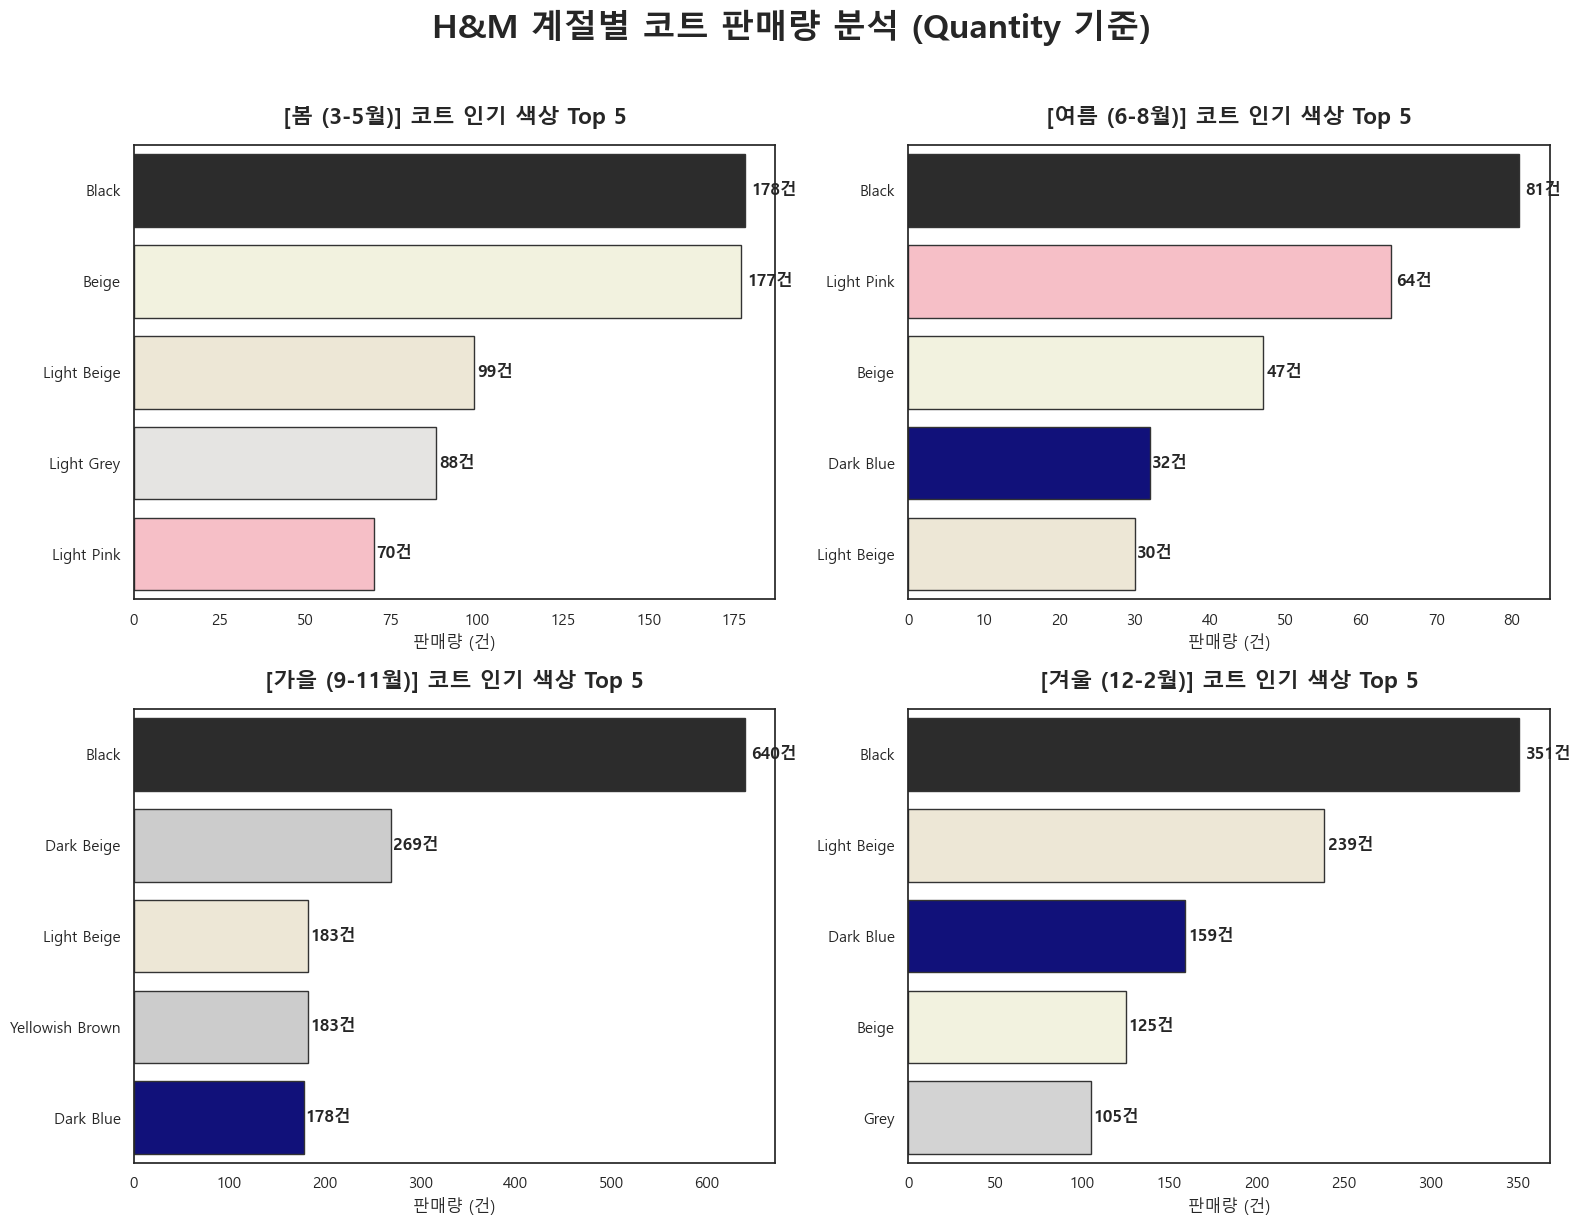

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 및 한글 설정
sns.set_theme(style="white")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# [자동 경로 설정]
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data")

# --- 색상 매핑 딕셔너리 (데이터셋 이름 : 실제 컬러) ---
color_map = {
    'Black': '#2C2C2C',
    'White': '#F5F5F5',
    'Off White': '#FAF9F6',
    'Beige': '#F5F5DC',
    'Light Beige': '#F1E9D2',
    'Dark Blue': '#00008B',
    'Blue': '#0000FF',
    'Dark Grey': '#A9A9A9',
    'Grey': '#D3D3D3',
    'Light Grey': '#E5E4E2',
    'Dark Red': '#8B0000',
    'Red': '#FF0000',
    'Pink': '#FFC0CB',
    'Light Pink': '#FFB6C1',
    'Dark Orange': '#FF8C00',
    'Orange': '#FFA500',
    'Yellow': '#FFFF00',
    'Green': '#008000',
    'Dark Green': '#006400',
    'Light Green': '#90EE90',
    'Brown': '#8B4513',
    'Dark Brown': '#654321',
    'Camel': '#C19A6B'
}

try:
    # 2. 데이터 로드
    transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_c.csv"), usecols=['t_dat', 'article_id'])
    articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"), usecols=['article_id', 'product_type_name', 'colour_group_name'])

    # 3. 코트(Coat) 상품 필터링
    coats = articles[articles['product_type_name'].str.contains('Coat', case=False, na=False)]
    
    # 4. 날짜 및 계절 설정
    transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
    transactions['month'] = transactions['t_dat'].dt.month

    def get_season(month):
        if month in [3, 4, 5]: return '봄 (3-5월)'
        elif month in [6, 7, 8]: return '여름 (6-8월)'
        elif month in [9, 10, 11]: return '가을 (9-11월)'
        else: return '겨울 (12-2월)'

    transactions['season'] = transactions['month'].apply(get_season)

    # 5. 데이터 병합
    df_coats = transactions.merge(coats, on='article_id', how='inner')

    # 6. 계절별 색상 '판매량(Count)' 계산
    season_color_count = df_coats.groupby(['season', 'colour_group_name']).size().reset_index(name='sales_count')

    # 7. 시각화
    seasons = ['봄 (3-5월)', '여름 (6-8월)', '가을 (9-11월)', '겨울 (12-2월)']
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for i, season in enumerate(seasons):
        # 해당 계절 Top 5 (판매량 기준)
        data = season_color_count[season_color_count['season'] == season].nlargest(5, 'sales_count')
        
        # 그래프에 표시될 색상 리스트 생성 (딕셔너리에 없으면 회색처리)
        palette = [color_map.get(col, '#CCCCCC') for col in data['colour_group_name']]
        
        # 막대 테두리를 주어 밝은색도 잘 보이게 설정 (edgecolor)
        sns.barplot(x='sales_count', y='colour_group_name', data=data, ax=axes[i], 
                    palette=palette, edgecolor='.2')
        
        axes[i].set_title(f'[{season}] 코트 인기 색상 Top 5', fontsize=16, fontweight='bold', pad=15)
        axes[i].set_xlabel('판매량 (건)', fontsize=12)
        axes[i].set_ylabel('')
        
        # 판매량 수치 표시
        for p in axes[i].patches:
            axes[i].text(p.get_width() + (p.get_width()*0.01), p.get_y() + p.get_height()/2, 
                         f'{int(p.get_width()):,}건', va='center', fontweight='bold')

    plt.suptitle('H&M 계절별 코트 판매량 분석 (Quantity 기준)', fontsize=24, y=1.02, fontweight='bold')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"오류 발생: {e}")

In [26]:
import pandas as pd
import os

# [자동 경로 설정]
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data")

try:
    # 1. 데이터 로드
    transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_c.csv"), usecols=['t_dat', 'article_id', 'price'])
    articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"), usecols=['article_id', 'product_type_name'])

    # 2. 코트(Coat) 상품 필터링
    coats = articles[articles['product_type_name'].str.contains('Coat', case=False, na=False)]
    
    # 3. 날짜 처리 (복사본 경고 방지를 위해 .copy() 사용)
    transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
    transactions['month'] = transactions['t_dat'].dt.month

    # 계절 정의 함수
    def get_season(month):
        if month in [3, 4, 5]: return '1_봄 (3-5월)'
        elif month in [6, 7, 8]: return '2_여름 (6-8월)'
        elif month in [9, 10, 11]: return '3_가을 (9-11월)'
        else: return '4_겨울 (12-2월)'

    transactions['season'] = transactions['month'].apply(get_season)

    # 4. 데이터 병합
    df_coats_price = transactions.merge(coats, on='article_id', how='inner')

    # 5. 계절별 가격 통계 산출 (50% 대신 median으로 안전하게 추출)
    season_stats = df_coats_price.groupby('season')['price'].agg(['count', 'mean', 'median', 'min', 'max']).sort_index()

    # 6. 결과 출력 테이블
    print("="*90)
    print(f"{'계절':^15} | {'판매건수':^10} | {'평균 가격':^12} | {'중간 가격(50%)':^12} | {'최고가':^10}")
    print("-"*90)
    
    for season in season_stats.index:
        row = season_stats.loc[season]
        display_name = season.split('_')[1]
        # row['median']으로 접근하여 KeyError 방지
        print(f"{display_name:<16} | {int(row['count']):>12,} | {row['mean']:>14.5f} | {row['median']:>15.5f} | {row['max']:>12.5f}")
    print("="*90)

    # 7. 분석 코멘트
    if '4_겨울 (12-2월)' in season_stats.index:
        winter_avg = season_stats.loc['4_겨울 (12-2월)', 'mean']
        summer_avg = season_stats.loc['2_여름 (6-8월)', 'mean']
        diff_ratio = (1 - (summer_avg / winter_avg)) * 100
        
        print(f"\n💡 데이터 검출 결과 요약")
        print(f"- 가격 하락폭: 겨울 대비 여름에 약 {diff_ratio:.2f}% 가격이 낮아짐.")
        print(f"- 중간값(Median) 확인: 대부분의 고객이 구매한 실제 가격대를 파악 완료.")

except Exception as e:
    print(f"❌ 검출된 오류: {e}")

      계절        |    판매건수    |    평균 가격     |  중간 가격(50%)  |    최고가    
------------------------------------------------------------------------------------------
봄 (3-5월)         |          831 |        0.07025 |         0.06778 |      0.25253
여름 (6-8월)        |          406 |        0.07926 |         0.06778 |      0.41739
가을 (9-11월)       |        2,118 |        0.11503 |         0.11693 |      0.30339
겨울 (12-2월)       |        1,569 |        0.07836 |         0.07202 |      0.29007

💡 데이터 검출 결과 요약
- 가격 하락폭: 겨울 대비 여름에 약 -1.15% 가격이 낮아짐.
- 중간값(Median) 확인: 대부분의 고객이 구매한 실제 가격대를 파악 완료.
